In [1]:
import numpy as np
import matplotlib.pyplot as plt
import powerlaw
from scipy.special import zetac
from mpmath import zeta 
from matplotlib.lines import Line2D
import pandas as pd
import matplotlib.gridspec as gridspec


def plot_rank_frequency(amount, xmin, xmax):
    ccdf = np.sort(amount)[::-1]
    ranks = np.arange(1, len(ccdf)+1)
    return ccdf
    
def calc_alpha(amount, size, xmin, xmax):
    amount = np.array(amount)[xmax > amount]
    amount = np.array(amount)[xmin < amount]
    alpha = 1 + len(amount) / (np.sum(np.log(amount/ (xmin - 0.5))))
    xmin2 = xmin
    invSigma = np.sqrt(len(amount) * ( (zeta(alpha, xmin2, 2)/zeta(alpha, xmin2)) - (zeta(alpha, xmin2, 1)/zeta(alpha,xmin2))**2 ))
    sigma = 1/invSigma
    return [alpha, sigma]



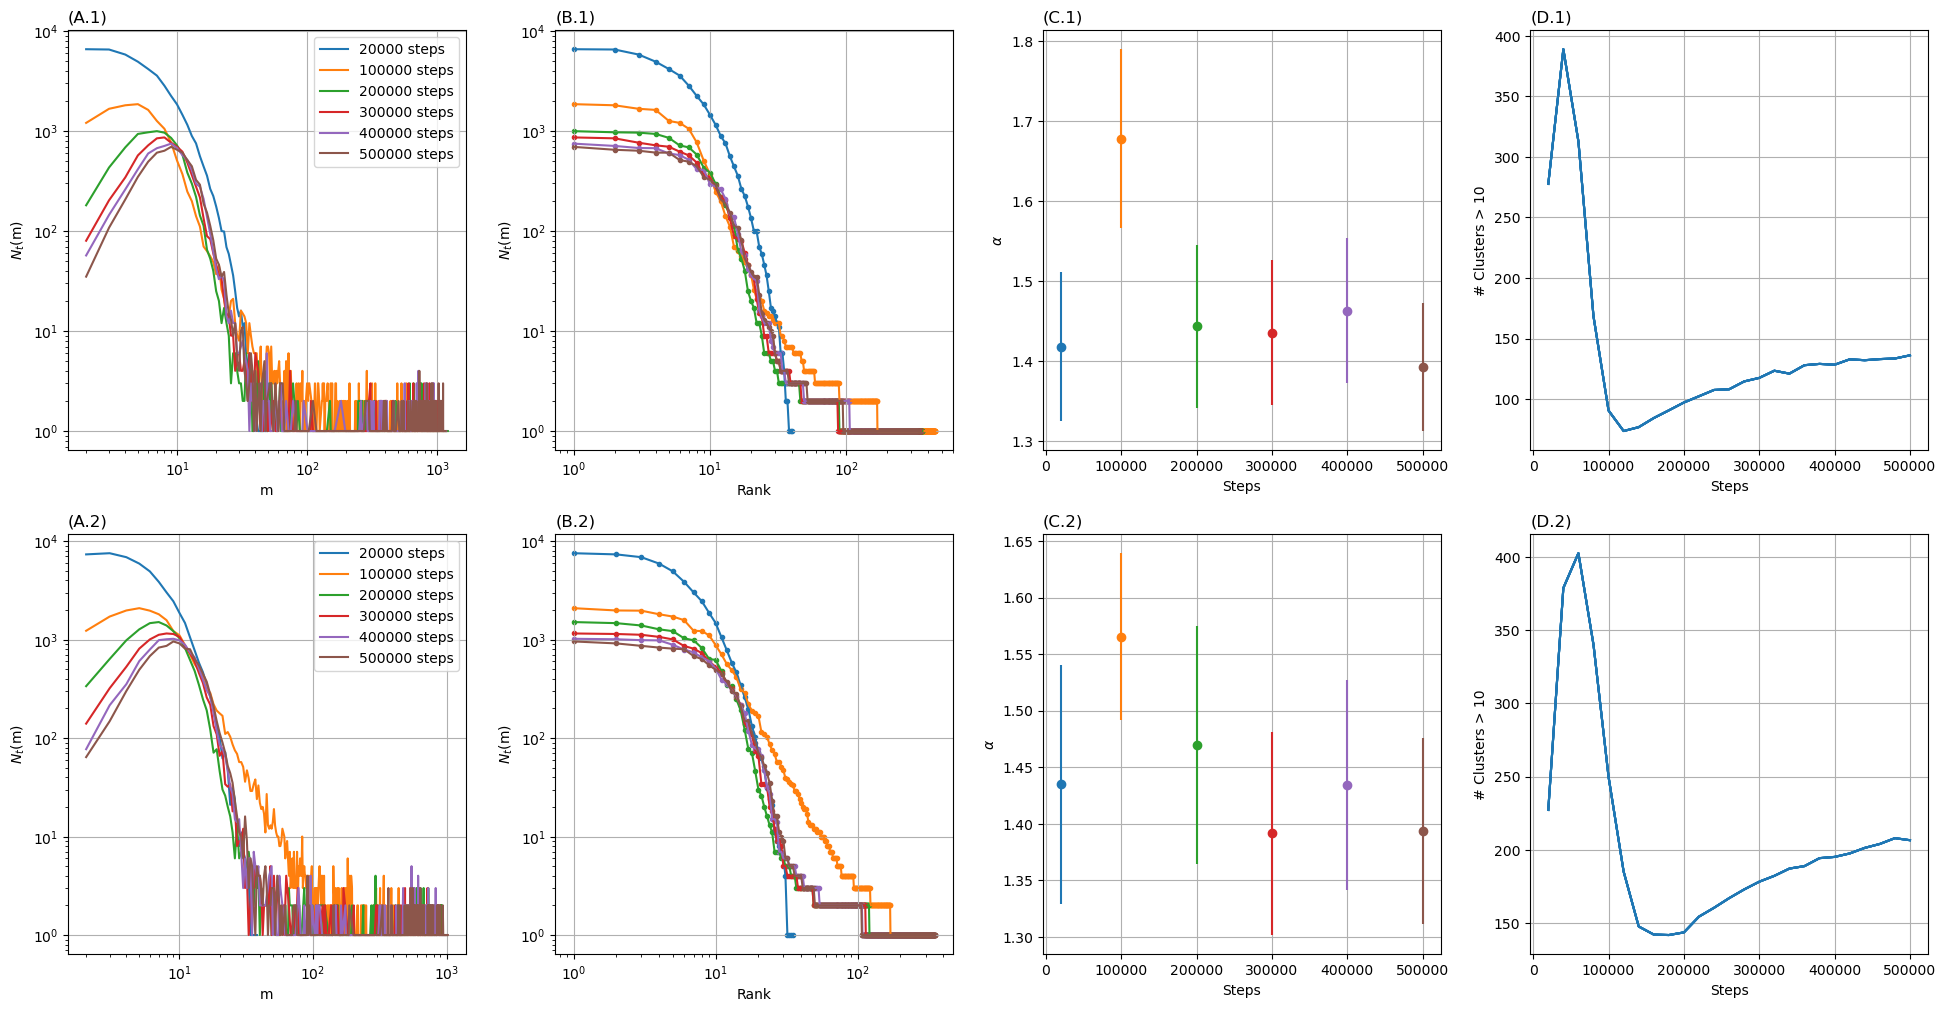

In [12]:
fig, ax = plt.subplots(2,4, figsize=(24, 12))
plt.subplots_adjust(wspace=0.225)

time = [20000, 100000, 200000, 300000, 400000, 500000 ]
time2 = [20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000, 220000, 240000, 260000, 280000, 300000, 320000, 340000, 360000, 380000, 400000, 420000, 440000, 460000, 480000, 500000]

name =  ["0.1500", "0.2000"]
name2=  ["0.15000", "0.20000"]
cmap = plt.get_cmap('tab10')

for i in range(len(name)):
    for k, j in enumerate(time):        
        size, amount = np.loadtxt("Pref_attach/Choice_true/{}/r50_2D_c{}_100_{}_0.300000_1.txt".format(name[i], name2[i], j), skiprows=2, unpack=True)
        size = size[1:]
        amount = amount[1:]
        ax[i, 0].loglog(size, amount, label="{} steps".format(j), c=cmap(k))


        lower_lim2 =  [-int(0.6 * len(amount))] * len(name)
        ccdf = np.sort(amount)[::-1]
        ranks = np.arange(1, len(ccdf)+1)
        ax[i, 1].scatter(ranks, ccdf, label="{} steps".format(j), marker='.')
        ax[i, 1].plot(ranks, ccdf)
        lower_lim = 0
        upper_lim = int(10**( (np.log10(len(amount))/3)))
        lower_lim2 = int(10**( 2*(np.log10(len(amount))/3)))
        upper_lim2 = -1
        
        out = calc_alpha(amount, size, 5, 500)
        ax[i,2].errorbar(j, out[0], yerr=out[1], fmt='o', c=cmap(k))    

        df = pd.read_csv("Pref_attach/Choice_true/{}/r50_2D_c{}_100_CLUSTERS_0.300000_1.txt".format(name[i], name2[i]), sep=" ", header=None)
        #ax[i, 3].plot(time2, df[0], label="> 0", c='r')
        ax[i, 3].plot(time2, df[1], label="> 10", c='#1f77b4')
        #ax[i, 3].plot(time2, df[2], label="> 100", c='b')

        ax[i,0].set_xscale('log')
        ax[i,0].set_yscale('log')
        ax[i,1].set_xscale('log')
        ax[i,1].set_yscale('log')   

    ax[i, 0].set_ylabel(r"$N_t$(m)")
    ax[i, 0].set_xlabel("m")
    ax[i, 0].legend()

    ax[i, 1].set_xlabel("Rank")
    ax[i, 1].set_ylabel(r"$N_t$(m)")

    ax[i, 2].set_xlabel("Steps")
    ax[i, 2].set_ylabel(r"$\alpha$")

    ax[i, 3].set_xlabel("Steps")
    ax[i, 3].set_ylabel("# Clusters > 10")    

    ax[i, 0].grid()
    ax[i, 1].grid()
    ax[i, 2].grid()
    ax[i, 3].grid()
ax[0,0].set_title("(A.1)", loc='left')
ax[0,1].set_title("(B.1)", loc='left')
ax[0,2].set_title("(C.1)", loc='left')
ax[0,3].set_title("(D.1)", loc='left')

ax[1,0].set_title("(A.2)", loc='left')
ax[1,1].set_title("(B.2)", loc='left')
ax[1,2].set_title("(C.2)", loc='left')
ax[1,3].set_title("(D.2)", loc='left')



fig.savefig('finalplot/city_choice_0.15-0.2.pdf', bbox_inches='tight', pad_inches=0.2)


In [ ]:

ax[0,0].set_title("(A.1)", loc='left')
ax[0,1].set_title("(B.1)", loc='left')
ax[0,2].set_title("(C.1)", loc='left')
ax[0,3].set_title("(D.1)", loc='left')

ax[1,0].set_title("(A.2)", loc='left')
ax[1,1].set_title("(B.2)", loc='left')
ax[1,2].set_title("(C.2)", loc='left')
ax[1,3].set_title("(D.2)", loc='left')

ax[2,0].set_title("(A.3)", loc='left')
ax[2,1].set_title("(B.3)", loc='left')
ax[2,2].set_title("(C.3)", loc='left')
ax[2,3].set_title("(D.3)", loc='left')

ax[3,0].set_title("(A.4)", loc='left')
ax[3,1].set_title("(B.4)", loc='left')
ax[3,2].set_title("(C.4)", loc='left')
ax[3,3].set_title("(D.4)", loc='left')

ax[4,0].set_title("(A.5)", loc='left')
ax[4,1].set_title("(B.5)", loc='left')
ax[4,2].set_title("(C.5)", loc='left')
ax[4,3].set_title("(D.5)", loc='left')

In [ ]:
fig, ax = plt.subplots(5,4, figsize=(20, 25))
plt.subplots_adjust(wspace=0.225)

time = [20000, 100000, 200000, 300000, 400000, 500000 ]
time2 = [20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000, 220000, 240000, 260000, 280000, 300000, 320000, 340000, 360000, 380000, 400000, 420000, 440000, 460000, 480000, 500000]

name = ["0.4000", "0.3500", "0.3000", "0.2500", "0.2000"]
name2= ["0.40000", "0.35000","0.30000", "0.25000", "0.20000"]
cmap = plt.get_cmap('tab10')

for i in range(len(name)):
    for k, j in enumerate(time):        
        size, amount = np.loadtxt("Pref_attach/Choice_true/{}/r50_2D_c{}_100_{}_0.300000_1.txt".format(name[i], name2[i], j), skiprows=2, unpack=True)
        size = size[1:]
        amount = amount[1:]
        ax[i, 0].loglog(size, amount, label="{} steps".format(j), c=cmap(k))


        lower_lim2 =  [-int(0.6 * len(amount))] * len(name)
        ccdf = np.sort(amount)[::-1]
        ranks = np.arange(1, len(ccdf)+1)
        ax[i, 1].scatter(ranks, ccdf, label="{} steps".format(j), marker='.')
        ax[i, 1].plot(ranks, ccdf)
        lower_lim = 0
        upper_lim = int(10**( (np.log10(len(amount))/3)))
        lower_lim2 = int(10**( 2*(np.log10(len(amount))/3)))
        upper_lim2 = -1
        
        out = calc_alpha(amount, size, 5, 500)
        ax[i,2].errorbar(j, out[0], yerr=out[1], fmt='o', c=cmap(k))    

        df = pd.read_csv("Pref_attach/Choice_true/{}/r50_2D_c{}_100_CLUSTERS_0.300000_1.txt".format(name[i], name2[i]), sep=" ", header=None)
        #ax[i, 3].plot(time2, df[0], label="> 0", c='r')
        ax[i, 3].plot(time2, df[1], label="> 10", c='#1f77b4')
        #ax[i, 3].plot(time2, df[2], label="> 100", c='b')

        ax[i,0].set_xscale('log')
        ax[i,0].set_yscale('log')
        ax[i,1].set_xscale('log')
        ax[i,1].set_yscale('log')   

    ax[i, 0].set_ylabel(r"$N_t$(m)")
    ax[i, 0].set_xlabel("m")
    ax[i, 0].legend()

    ax[i, 1].set_xlabel("Rank")
    ax[i, 1].set_ylabel(r"$N_t$(m)")

    ax[i, 2].set_xlabel("Steps")
    ax[i, 2].set_ylabel(r"$\alpha$")

    ax[i, 3].set_xlabel("Steps")
    ax[i, 3].set_ylabel("# Clusters > 10")    

    ax[i, 0].grid()
    ax[i, 1].grid()
    ax[i, 2].grid()
    ax[i, 3].grid()

ax[0,0].set_title("(A.1)", loc='left')
ax[0,1].set_title("(B.1)", loc='left')
ax[0,2].set_title("(C.1)", loc='left')
ax[0,3].set_title("(D.1)", loc='left')

ax[1,0].set_title("(A.2)", loc='left')
ax[1,1].set_title("(B.2)", loc='left')
ax[1,2].set_title("(C.2)", loc='left')
ax[1,3].set_title("(D.2)", loc='left')

ax[2,0].set_title("(A.3)", loc='left')
ax[2,1].set_title("(B.3)", loc='left')
ax[2,2].set_title("(C.3)", loc='left')
ax[2,3].set_title("(D.3)", loc='left')

ax[3,0].set_title("(A.4)", loc='left')
ax[3,1].set_title("(B.4)", loc='left')
ax[3,2].set_title("(C.4)", loc='left')
ax[3,3].set_title("(D.4)", loc='left')

ax[4,0].set_title("(A.5)", loc='left')
ax[4,1].set_title("(B.5)", loc='left')
ax[4,2].set_title("(C.5)", loc='left')
ax[4,3].set_title("(D.5)", loc='left')


fig.savefig('finalplot/city_choice.pdf', bbox_inches='tight', pad_inches=0.2)


Calculating best minimal value for power law fit
/tmp/ipykernel_11848/332730516.py:34: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[0, 1].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')
Calculating best minimal value for power law fit
Assuming nested distributions


1.2526453272843368 0.027086422224973455
------------------------------------
1.6301704738367628 0.04981935028779293
198.9374789108037 6.846709430155544e-10
-1.2178793105962318 0.11859650762914098
-0.23371748390388336 0.5387759331270892
0.07197386332558153 0.9485512093705133
4.190320271288689 0.1512930639428817
------------------------------------
2.0233742850727943 0.12145218309916399
42.73408118256292 0.0021816130907115787


Calculating best minimal value for power law fit
Assuming nested distributions


-0.10596644894028362 0.6452566184865748
-0.03986333913955509 0.8183802624777827
0.43248937960140754 0.5196460798979808
2.679984351667337 0.16187843629578658
------------------------------------
2.5002205331696206 0.2500367555282701
------------------------------------
2.838005318300305 0.40108564280202624
------------------------------------
4.447286128694356 1.5416732243305336
------------------------------------
5.475895152947407 1.6917293527283213
------------------------------------
4.081260194063404 0.4154770398102019
------------------------------------
3.9732005918307474 0.42047406006227556
------------------------------------
4.055864466341484 0.4772458495302672
------------------------------------
4.594334999517198 1.1981116665057325
------------------------------------
{'power_law': <class 'powerlaw.Power_Law'>, 'lognormal': <class 'powerlaw.Lognormal'>, 'exponential': <class 'powerlaw.Exponential'>, 'truncated_power_law': <class 'powerlaw.Truncated_Power_Law'>, 'stretched_ex

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


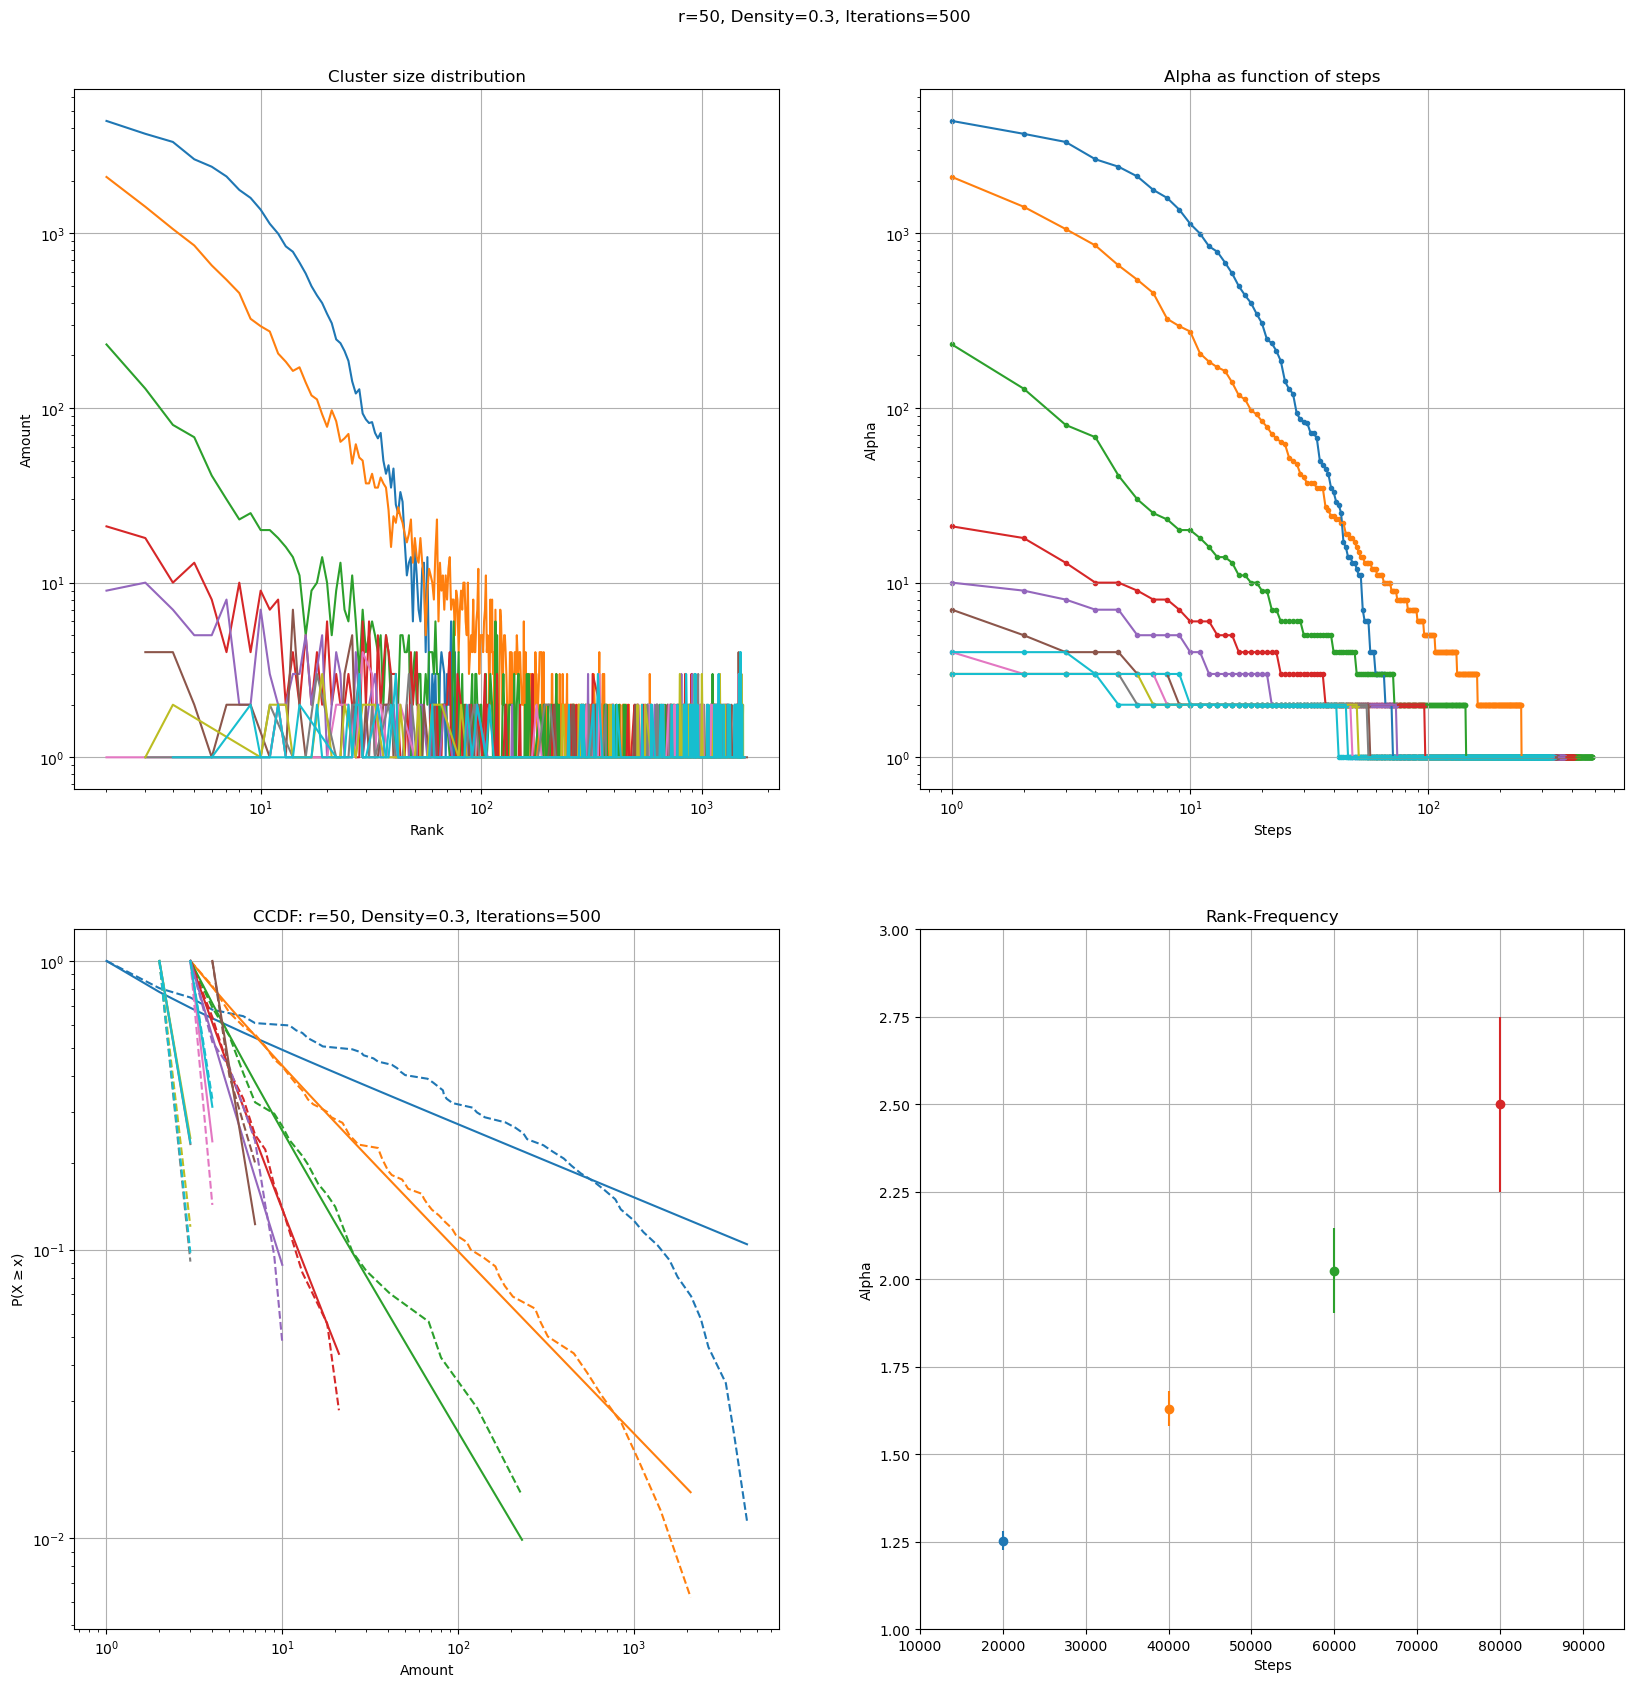

In [4]:
fig, ax = plt.subplots(2, 2, figsize=(20, 20))
name = [20000, 40000,60000, 80000, 100000, 140000, 200000, 240000, 260000, 300000, 400000]
  
ax[0, 0].grid()
ax[0, 1].grid()
ax[1,0].grid()
ax[1,1].grid()

ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')

ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')

cmap = plt.get_cmap('tab10')
for i in range((len(name))):

    size, amount = np.loadtxt("Pref_attach/Choice_true/0.0000/r50_2D_c0.00000_100_{}_0.300000_1.txt".format(name[i]), skiprows=2, unpack=True)
    size = size[1:]
    amount = amount[1:]
    ax[0,0].loglog(size, amount, label="Time {}".format(name[i]), c=cmap(i))
    
    lower_lim2 =  [-int(0.6 * len(amount))] * len(name)

    result = powerlaw.Fit(amount, discrete=True)
    result.plot_ccdf(ax=ax[1, 0], linestyle='--', label="upper_lim = [int(0.1 * len(amount))] * len(name)Time {}".format(name[i]), c=cmap(i))
    result.power_law.plot_ccdf(ax=ax[1, 0],  label="Time {}".format(name[i]), c=cmap(i))
    ax[1,1].errorbar(name[i], result.power_law.alpha, yerr=result.power_law.sigma, fmt='o', color=cmap(i))
    print(result.power_law.alpha, result.power_law.sigma)


    ccdf = np.sort(amount)[::-1]
    ranks = np.arange(1, len(ccdf)+1)
    ax[0, 1].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')
    ax[0, 1].plot(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i))

    lower_lim = 0
    upper_lim = int(10**( (np.log10(len(amount))/3)))
    lower_lim2 = int(10**( 2*(np.log10(len(amount))/3)))
    upper_lim2 = -1

    out = calc_alpha(amount, size, lower_lim, upper_lim)
    out2 = calc_alpha(amount, size, upper_lim, lower_lim2)
    out3 = calc_alpha(amount, size, lower_lim2, upper_lim2)
    out4 = calc_alpha(amount, size, 0, -1)
    #ax[0,1].errorbar(name[i], out[0], yerr=out[1], fmt='v', c=cmap(i))
    #ax[0,1].errorbar(name[i], out2[0], yerr=out2[1], fmt='D', c=cmap(i))
    #ax[0,1].errorbar(name[i], out3[0], yerr=out3[1], fmt='^', c=cmap(i))
    #ax[0,1].errorbar(name[i], out4[0], yerr=out4[1], fmt='o', c=cmap(i))
    


   
    if i == 1  or i == 2:
        r, p = result.distribution_compare('power_law', 'exponential')
        print(r, p)
        r, p = result.distribution_compare('power_law', 'truncated_power_law')
        print(r, p)
        r, p = result.distribution_compare('power_law', 'lognormal')
        print(r, p)
        r, p = result.distribution_compare('power_law', 'stretched_exponential')
        print(r, p)
        r, p = result.distribution_compare('power_law', 'lognormal_positive')
        print(r, p)

    print('------------------------------------')

print(result.supported_distributions)
fig.suptitle("r=50, Density=0.3, Iterations=500", y=0.92)
ax[1,1].set_xlim([10000, 95000])
ax[1,1].set_ylim([1, 3])

ax[0,0].set_xlabel("Rank")
ax[0,0].set_ylabel("Amount")
ax[0,0].set_title("Cluster size distribution")

ax[1,1].set_xlabel("Steps")
ax[1,1].set_ylabel("Alpha")

ax[1,1].set_title("Rank-Frequency")

ax[0,1].set_xlabel("Steps")
ax[0,1].set_ylabel("Alpha")
ax[0,1].set_title("Alpha as function of steps")


ax[1,0].set_xlabel("Amount")
ax[1,0].set_ylabel("P(X" + r'$ \geq$' +"x)")
ax[1,0].set_title("CCDF: r=50, Density=0.3, Iterations=500")


ax[0,0].set_xscale('log')
ax[0,0].set_yscale('log')

Calculating best minimal value for power law fit
/home/sennevw/anaconda3/envs/thesisvenv/lib/python3.11/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /
/home/sennevw/anaconda3/envs/thesisvenv/lib/python3.11/site-packages/powerlaw.py:699: RuntimeWarning: divide by zero encountered in divide
  (CDF_diff**2) /
/tmp/ipykernel_6334/2867719431.py:34: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[0, 1].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')
Calculating best minimal value for power law fit
Assuming nested distributions


1.2526453272843368 0.027086422224973455
------------------------------------
1.6301704738367628 0.04981935028779293
198.9374789108037 6.846709430155544e-10
-1.2178793105962318 0.11859650762914098
-0.23371748390388336 0.5387759331270892
0.07197386332558153 0.9485512093705133
------------------------------------
2.0233742850727943 0.12145218309916399
42.73408118256292 0.0021816130907115787


Calculating best minimal value for power law fit
Assuming nested distributions


-0.10596644894028362 0.6452566184865748
-0.03986333913955509 0.8183802624777827
0.43248937960140754 0.5196460798979808
------------------------------------
2.838005318300305 0.40108564280202624
------------------------------------
5.475895152947407 1.6917293527283213
------------------------------------
4.055864466341484 0.4772458495302672
------------------------------------
4.594334999517198 1.1981116665057325
------------------------------------


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


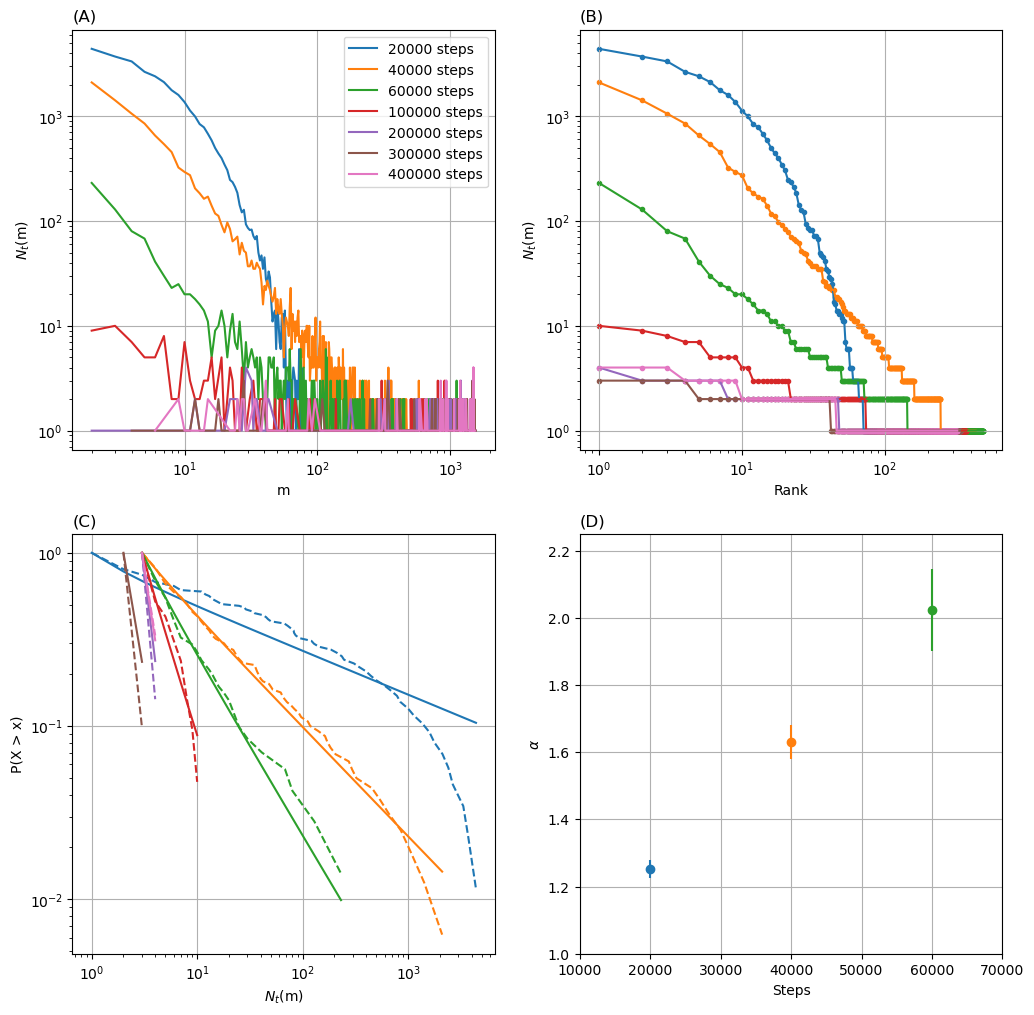

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
name = [20000, 40000,60000, 100000, 200000, 300000, 400000]
  
ax[0, 0].grid()
ax[0, 1].grid()
ax[1,0].grid()
ax[1,1].grid()

ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')

ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')

cmap = plt.get_cmap('tab10')
for i in range((len(name))):

    size, amount = np.loadtxt("Pref_attach/Choice_true/0.0000/r50_2D_c0.00000_100_{}_0.300000_1.txt".format(name[i]), skiprows=2, unpack=True)
    size = size[1:]
    amount = amount[1:]
    ax[0,0].loglog(size, amount, label="{} steps".format(name[i]), c=cmap(i))
    
    lower_lim2 =  [-int(0.6 * len(amount))] * len(name)

    result = powerlaw.Fit(amount, discrete=True)
    result.plot_ccdf(ax=ax[1, 0], linestyle='--', label="upper_lim = [int(0.1 * len(amount))] * len(name)Time {}".format(name[i]), c=cmap(i))
    result.power_law.plot_ccdf(ax=ax[1, 0],  label="Time {}".format(name[i]), c=cmap(i))
    ax[1,1].errorbar(name[i], result.power_law.alpha, yerr=result.power_law.sigma, fmt='o', color=cmap(i))
    print(result.power_law.alpha, result.power_law.sigma)


    ccdf = np.sort(amount)[::-1]
    ranks = np.arange(1, len(ccdf)+1)
    ax[0, 1].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')
    ax[0, 1].plot(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i))

    lower_lim = 0
    upper_lim = int(10**( (np.log10(len(amount))/3)))
    lower_lim2 = int(10**( 2*(np.log10(len(amount))/3)))
    upper_lim2 = -1

    out = calc_alpha(amount, size, lower_lim, upper_lim)
    out2 = calc_alpha(amount, size, upper_lim, lower_lim2)
    out3 = calc_alpha(amount, size, lower_lim2, upper_lim2)
    out4 = calc_alpha(amount, size, 0, -1)
    #ax[0,1].errorbar(name[i], out[0], yerr=out[1], fmt='v', c=cmap(i))
    #ax[0,1].errorbar(name[i], out2[0], yerr=out2[1], fmt='D', c=cmap(i))
    #ax[0,1].errorbar(name[i], out3[0], yerr=out3[1], fmt='^', c=cmap(i))
    #ax[0,1].errorbar(name[i], out4[0], yerr=out4[1], fmt='o', c=cmap(i))
    



        
    if i == 1  or i == 2:
        r, p = result.distribution_compare('power_law', 'exponential')
        print(r, p)
        r, p = result.distribution_compare('power_law', 'truncated_power_law')
        print(r, p)
        r, p = result.distribution_compare('power_law', 'lognormal')
        print(r, p)
        r, p = result.distribution_compare('power_law', 'stretched_exponential')
        print(r, p)

    print('------------------------------------')

ax[0,0].legend()
ax[0,0].set_xscale('log')
ax[0,0].set_yscale('log')
ax[0,0].set_xlabel(r"m")
ax[0,0].set_ylabel(r"$N_t$(m)")
ax[0,0].set_title("(A)", loc='left')

ax[0,1].set_xlabel("Rank")
ax[0,1].set_ylabel(r"$N_t$(m)")
ax[0,1].set_title("(B)", loc='left')

ax[1,0].set_xlabel(r"$N_t$(m)")
ax[1,0].set_ylabel("P(X > x)")
ax[1,0].set_title("(C)", loc='left')

ax[1,1].set_xlim([10000, 70000])
ax[1,1].set_ylim([1, 2.25])
ax[1,1].set_xlabel("Steps")
ax[1,1].set_ylabel(r"$\alpha$")
ax[1,1].set_title("(D)", loc='left')


fig.savefig('finalplot/city1.pdf', bbox_inches='tight', pad_inches=0.2)

Calculating best minimal value for power law fit
/home/sennevw/anaconda3/envs/thesisvenv/lib/python3.11/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /
/home/sennevw/anaconda3/envs/thesisvenv/lib/python3.11/site-packages/powerlaw.py:699: RuntimeWarning: divide by zero encountered in divide
  (CDF_diff**2) /
/tmp/ipykernel_9201/3692093060.py:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[0, 1].scatter(ranks, ccdf, label="{} steps".format(name[i]), c=cmap(i), marker='.')
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for

[1.6798756582605967, mpf('0.24059489012134522')]
[1.6834796019578373, mpf('0.081767869592920886')]
[1.6707133510594891, mpf('0.079115561095497791')]
[1.6496461206096633, mpf('0.075078119151928052')]
[1.649349846382052, mpf('0.073586521602717905')]
[1.662630400441532, mpf('0.075580174429760574')]


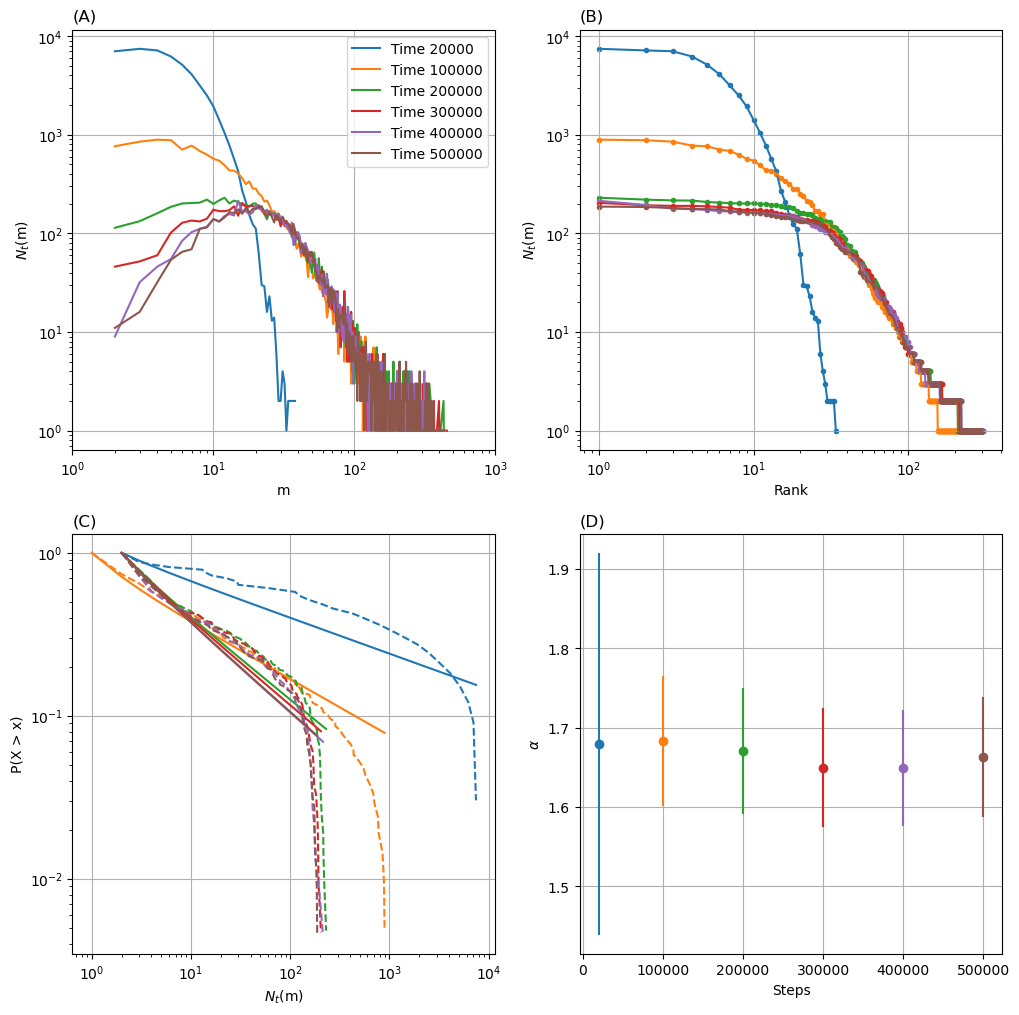

In [36]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
name = [20000,100000, 200000, 300000, 400000, 500000]
  
ax[0, 0].grid()
ax[0, 1].grid()
ax[1,0].grid()
ax[1,1].grid()

ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')

ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')

cmap = plt.get_cmap('tab10')
for i in range((len(name))):

    size, amount = np.loadtxt("Pref_attach/Choice_true/0.3000/r20/r20_2D_c0.30000_100_{}_0.300000_1.txt".format(name[i]), skiprows=2, unpack=True)
    size = size[1:]
    amount = amount[1:]
    ax[0, 0].loglog(size, amount, label="Time {}".format(name[i]), c=cmap(i))
    
    lower_lim2 =  [-int(0.6 * len(amount))] * len(name)

    result = powerlaw.Fit(amount, discrete=True)
    result.plot_ccdf(ax=ax[1, 0], linestyle='--', label="upper_lim = [int(0.1 * len(amount))] * len(name)Time {}".format(name[i]), c=cmap(i))
    result.power_law.plot_ccdf(ax=ax[1, 0],  label="Time {}".format(name[i]), c=cmap(i))
    

    ccdf = np.sort(amount)[::-1]
    ranks = np.arange(1, len(ccdf)+1)
    ax[0, 1].scatter(ranks, ccdf, label="{} steps".format(name[i]), c=cmap(i), marker='.')
    ax[0, 1].loglog(ranks, ccdf, label="{} steps".format(name[i]), c=cmap(i))



    out = calc_alpha(amount, size, 5, 96)
    print(out)
    ax[1,1].errorbar(name[i], out[0], yerr=out[1], fmt='o', c=cmap(i))
        


ax[0,0].set_xlabel("m")
ax[0,0].set_ylabel(r"$N_t$(m)")
ax[0,0].set_title("(A)", loc='left')

ax[0,0].legend()

ax[1,1].set_xlabel("Steps")
ax[1,1].set_ylabel(r"$\alpha$")
ax[1,1].set_title("(D)", loc='left')

ax[0,1].set_xlabel("Rank")
ax[0,1].set_ylabel(r"$N_t$(m)")
ax[0,1].set_title("(B)", loc='left')

ax[0,0].set_xlim(1, 1000)

ax[1,0].set_xlabel(r"$N_t$(m)")
ax[1,0].set_ylabel("P(X > x)")
ax[1,0].set_title("(C)", loc='left')

ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')

fig.savefig('finalplot/city_stable.pdf', bbox_inches='tight', pad_inches=0.2)

Calculating best minimal value for power law fit
/home/sennevw/anaconda3/envs/thesisvenv/lib/python3.11/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /
/tmp/ipykernel_19746/2029000579.py:33: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[0, 1].scatter(ranks, ccdf, label="{} steps".format(name[i]), c=cmap(i), marker='.')
Calculating best minimal value for power law fit
/home/sennevw/anaconda3/envs/thesisvenv/lib/python3.11/site-packages/powerlaw.py:1185: RuntimeWarning: divide by zero encountered in scalar divide
  C = 1.0/C
/home/sennevw/anaconda3/envs/thesisvenv/lib/python3.11/site-packages/scipy/optimize/_optimize.py:941: RuntimeWarning: invalid val

[1.6798756582605967, mpf('0.24059489012134522')]
[1.6834796019578373, mpf('0.081767869592920886')]
[1.6707133510594891, mpf('0.079115561095497791')]
[1.6496461206096633, mpf('0.075078119151928052')]


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


[1.649349846382052, mpf('0.073586521602717905')]
[1.662630400441532, mpf('0.075580174429760574')]


Calculating best minimal value for power law fit


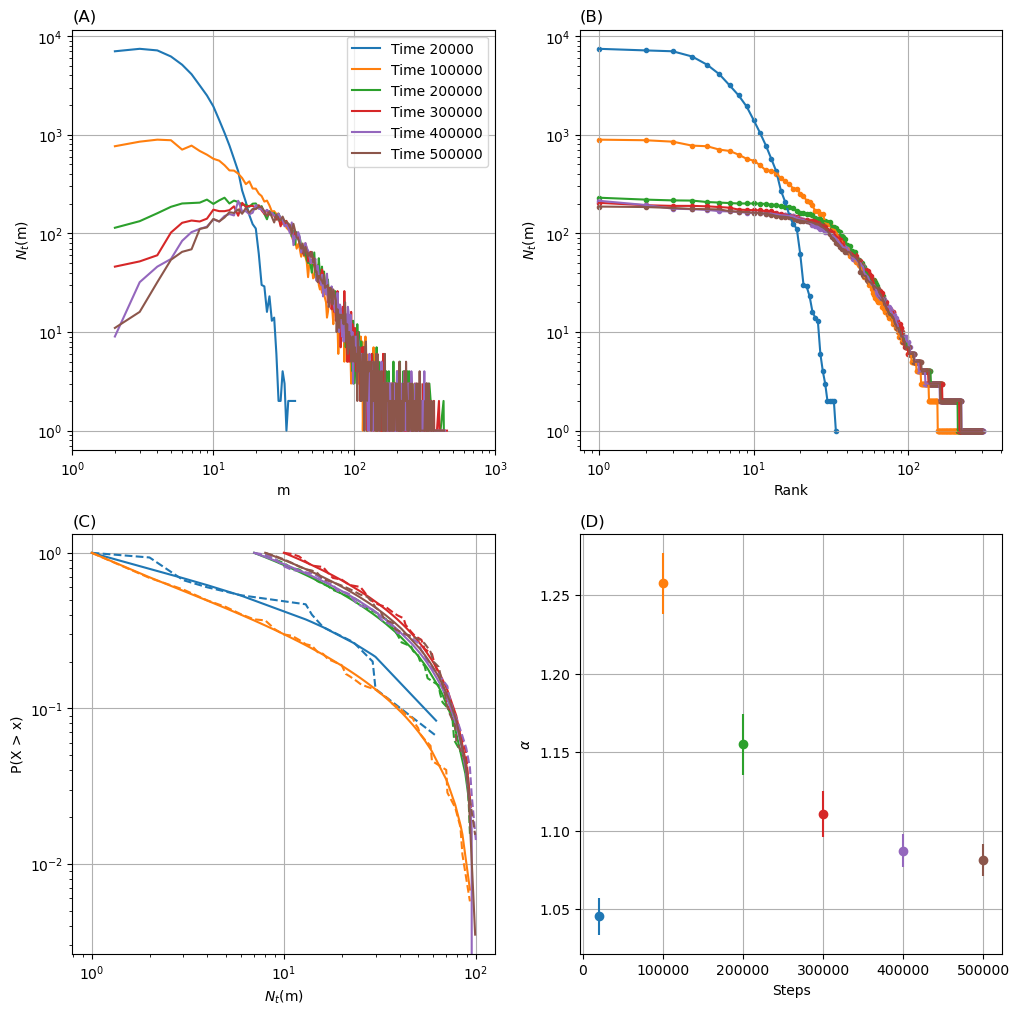

In [4]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
name = [20000,100000, 200000, 300000, 400000, 500000]
  
ax[0, 0].grid()
ax[0, 1].grid()
ax[1,0].grid()
ax[1,1].grid()

ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')

ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')

cmap = plt.get_cmap('tab10')
for i in range((len(name))):

    size, amount = np.loadtxt("Pref_attach/Choice_true/0.3000/r20/r20_2D_c0.30000_100_{}_0.300000_1.txt".format(name[i]), skiprows=2, unpack=True)
    size = size[1:]
    amount = amount[1:]
    ax[0, 0].loglog(size, amount, label="Time {}".format(name[i]), c=cmap(i))
    
    lower_lim2 =  [-int(0.6 * len(amount))] * len(name)

    result = powerlaw.Fit(amount, discrete=True, xmax=100)
    result.plot_ccdf(ax=ax[1, 0], linestyle='--', label="upper_lim = [int(0.1 * len(amount))] * len(name)Time {}".format(name[i]), c=cmap(i))
    result.power_law.plot_ccdf(ax=ax[1, 0],  label="Time {}".format(name[i]), c=cmap(i))
    ax[1,1].errorbar(name[i], result.power_law.alpha, yerr=result.power_law.sigma, fmt='o', color=cmap(i))
    

    ccdf = np.sort(amount)[::-1]
    ranks = np.arange(1, len(ccdf)+1)
    ax[0, 1].scatter(ranks, ccdf, label="{} steps".format(name[i]), c=cmap(i), marker='.')
    ax[0, 1].loglog(ranks, ccdf, label="{} steps".format(name[i]), c=cmap(i))



    out = calc_alpha(amount, size, 5, 96)
    print(out)
    #ax[1,1].errorbar(name[i], out[0], yerr=out[1], fmt='o', c=cmap(i))
        


ax[0,0].set_xlabel("m")
ax[0,0].set_ylabel(r"$N_t$(m)")
ax[0,0].set_title("(A)", loc='left')

ax[0,0].legend()

ax[1,1].set_xlabel("Steps")
ax[1,1].set_ylabel(r"$\alpha$")
ax[1,1].set_title("(D)", loc='left')

ax[0,1].set_xlabel("Rank")
ax[0,1].set_ylabel(r"$N_t$(m)")
ax[0,1].set_title("(B)", loc='left')

ax[0,0].set_xlim(1, 1000)

ax[1,0].set_xlabel(r"$N_t$(m)")
ax[1,0].set_ylabel("P(X > x)")
ax[1,0].set_title("(C)", loc='left')

ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')

fig.savefig('finalplot/city_stable2.pdf', bbox_inches='tight', pad_inches=0.2)

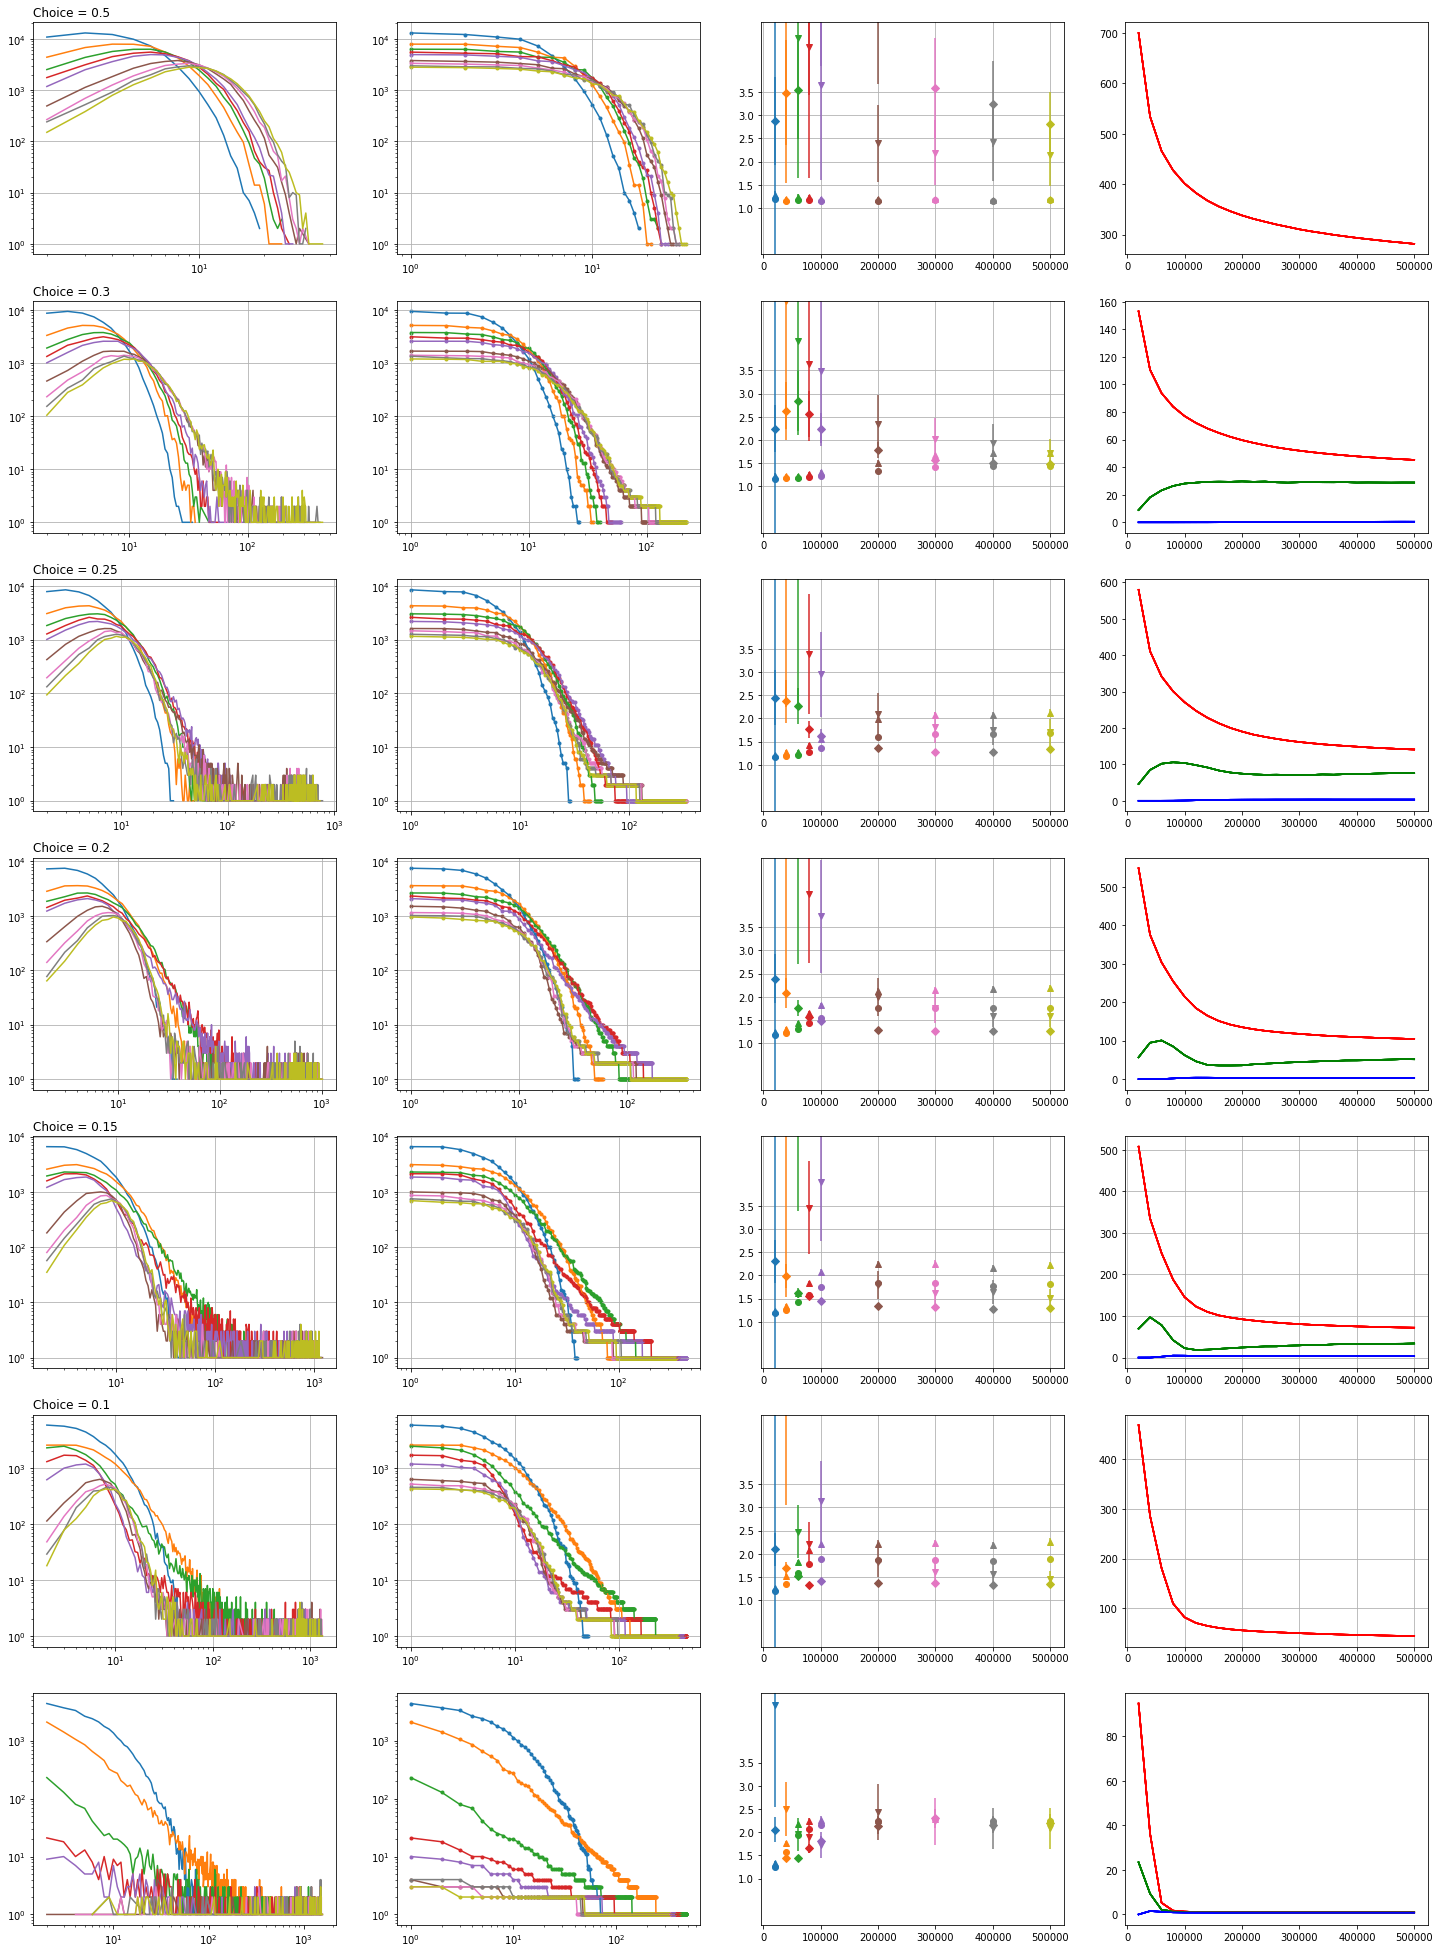

In [3]:
fig, ax = plt.subplots(7,4, figsize=(25, 35))



time = [20000, 40000, 60000, 80000, 100000, 200000, 300000, 400000, 500000 ]
time2 = [20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000, 220000, 240000, 260000, 280000, 300000, 320000, 340000, 360000, 380000, 400000, 420000, 440000, 460000, 480000, 500000]

name = ["0.5000", "0.3000", "0.2500", "0.2000", "0.1500", "0.1000", "0.0000"]
name2= ["0.50000", "0.30000", "0.25000", "0.20000", "0.15000", "0.10000", "0.00000"]
cmap = plt.get_cmap('tab10')

for i in range(len(name)):
    for k, j in enumerate(time):
        
        
        size, amount = np.loadtxt("Pref_attach/Choice_true/{}/r50_2D_c{}_100_{}_0.300000_1.txt".format(name[i], name2[i], j), skiprows=2, unpack=True)
        size = size[1:]
        amount = amount[1:]
        ax[i, 0].loglog(size, amount, label="Time {}".format(name[i]), c=cmap(k))


        lower_lim2 =  [-int(0.6 * len(amount))] * len(name)
        ccdf = np.sort(amount)[::-1]
        ranks = np.arange(1, len(ccdf)+1)
        ax[i, 1].scatter(ranks, ccdf, label="Time {}".format(j), marker='.')
        ax[i, 1].plot(ranks, ccdf)
        lower_lim = 0
        upper_lim = int(10**( (np.log10(len(amount))/3)))
        lower_lim2 = int(10**( 2*(np.log10(len(amount))/3)))
        upper_lim2 = -1

        out = calc_alpha(amount, size, lower_lim, upper_lim)
        out2 = calc_alpha(amount, size, upper_lim, lower_lim2)
        out3 = calc_alpha(amount, size, lower_lim2, upper_lim2)
        out4 = calc_alpha(amount, size, 0, -1)
        ax[i,2].errorbar(j, out[0], yerr=out[1], fmt='v', c=cmap(k))
        ax[i,2].errorbar(j, out2[0], yerr=out2[1], fmt='D', c=cmap(k))
        ax[i,2].errorbar(j, out3[0], yerr=out3[1], fmt='^', c=cmap(k))
        ax[i,2].errorbar(j, out4[0], yerr=out4[1], fmt='o', c=cmap(k))
        
        if ((i != 0) and (i != 5)):
            df = pd.read_csv("Pref_attach/Choice_true/{}/r50_2D_c{}_100_CLUSTERS_0.300000_1.txt".format(name[i], name2[i]), sep=" ", header=None)
            ax[i, 3].plot(time2, df[0] * 0.25, label="> 0", c='r')
            ax[i, 3].plot(time2, df[1]* 0.25, label="> 10", c='g')
            ax[i, 3].plot(time2, df[2] * 0.25, label="> 100", c='b')
        if (i == 5):
            df = pd.read_csv("Pref_attach/Choice_true/0.1000/r50_2D_c0.10000_100_CLUSTERS_0.300000_1.txt".format(name[i], name2[i]), sep=" ", header=None)
            df = df.drop(df.columns[-1], axis=1)
            average = df.mean()
            ax[i, 3].plot(time2, average, label="Average", c='r')
        
        if (i == 0):
            df = pd.read_csv("Pref_attach/Choice_true/0.5000/r50_2D_c0.50000_100_CLUSTERS_0.300000_1.txt".format(name[i], name2[i]), sep=" ", header=None)
            df = df.drop(df.columns[-1], axis=1)
            average = df.mean()
            ax[i, 3].plot(time2, average, label="Average", c='r')

        ax[i,0].set_xscale('log')
        ax[i,0].set_yscale('log')
        ax[i,1].set_xscale('log')
        ax[i,1].set_yscale('log')   
        ax[i, 2].set_yticks(np.arange(1, 4, 0.5))
        ax[i, 2].set_ylim(0, 5) 


ax[0,0].set_title("Choice = 0.5", loc='left')
ax[1,0].set_title("Choice = 0.3", loc='left')
ax[2,0].set_title("Choice = 0.25", loc='left')
ax[3,0].set_title("Choice = 0.2", loc='left')
ax[4,0].set_title("Choice = 0.15", loc='left')
ax[5,0].set_title("Choice = 0.1", loc='left')

ax[0,0].grid()
ax[0,1].grid()
ax[0,2].grid()
ax[1,0].grid()
ax[1,1].grid()
ax[1,2].grid()
ax[2,0].grid()
ax[2,1].grid()
ax[2,2].grid()
ax[3,0].grid()
ax[3,1].grid()
ax[3,2].grid()
ax[4,0].grid()
ax[4,1].grid()
ax[4,2].grid()
ax[5,0].grid()
ax[5,1].grid()
ax[5,2].grid()
ax[5,3].grid()
ax[4,3].grid()




Text(0.0, 1.0, 'Choice = 0.15')

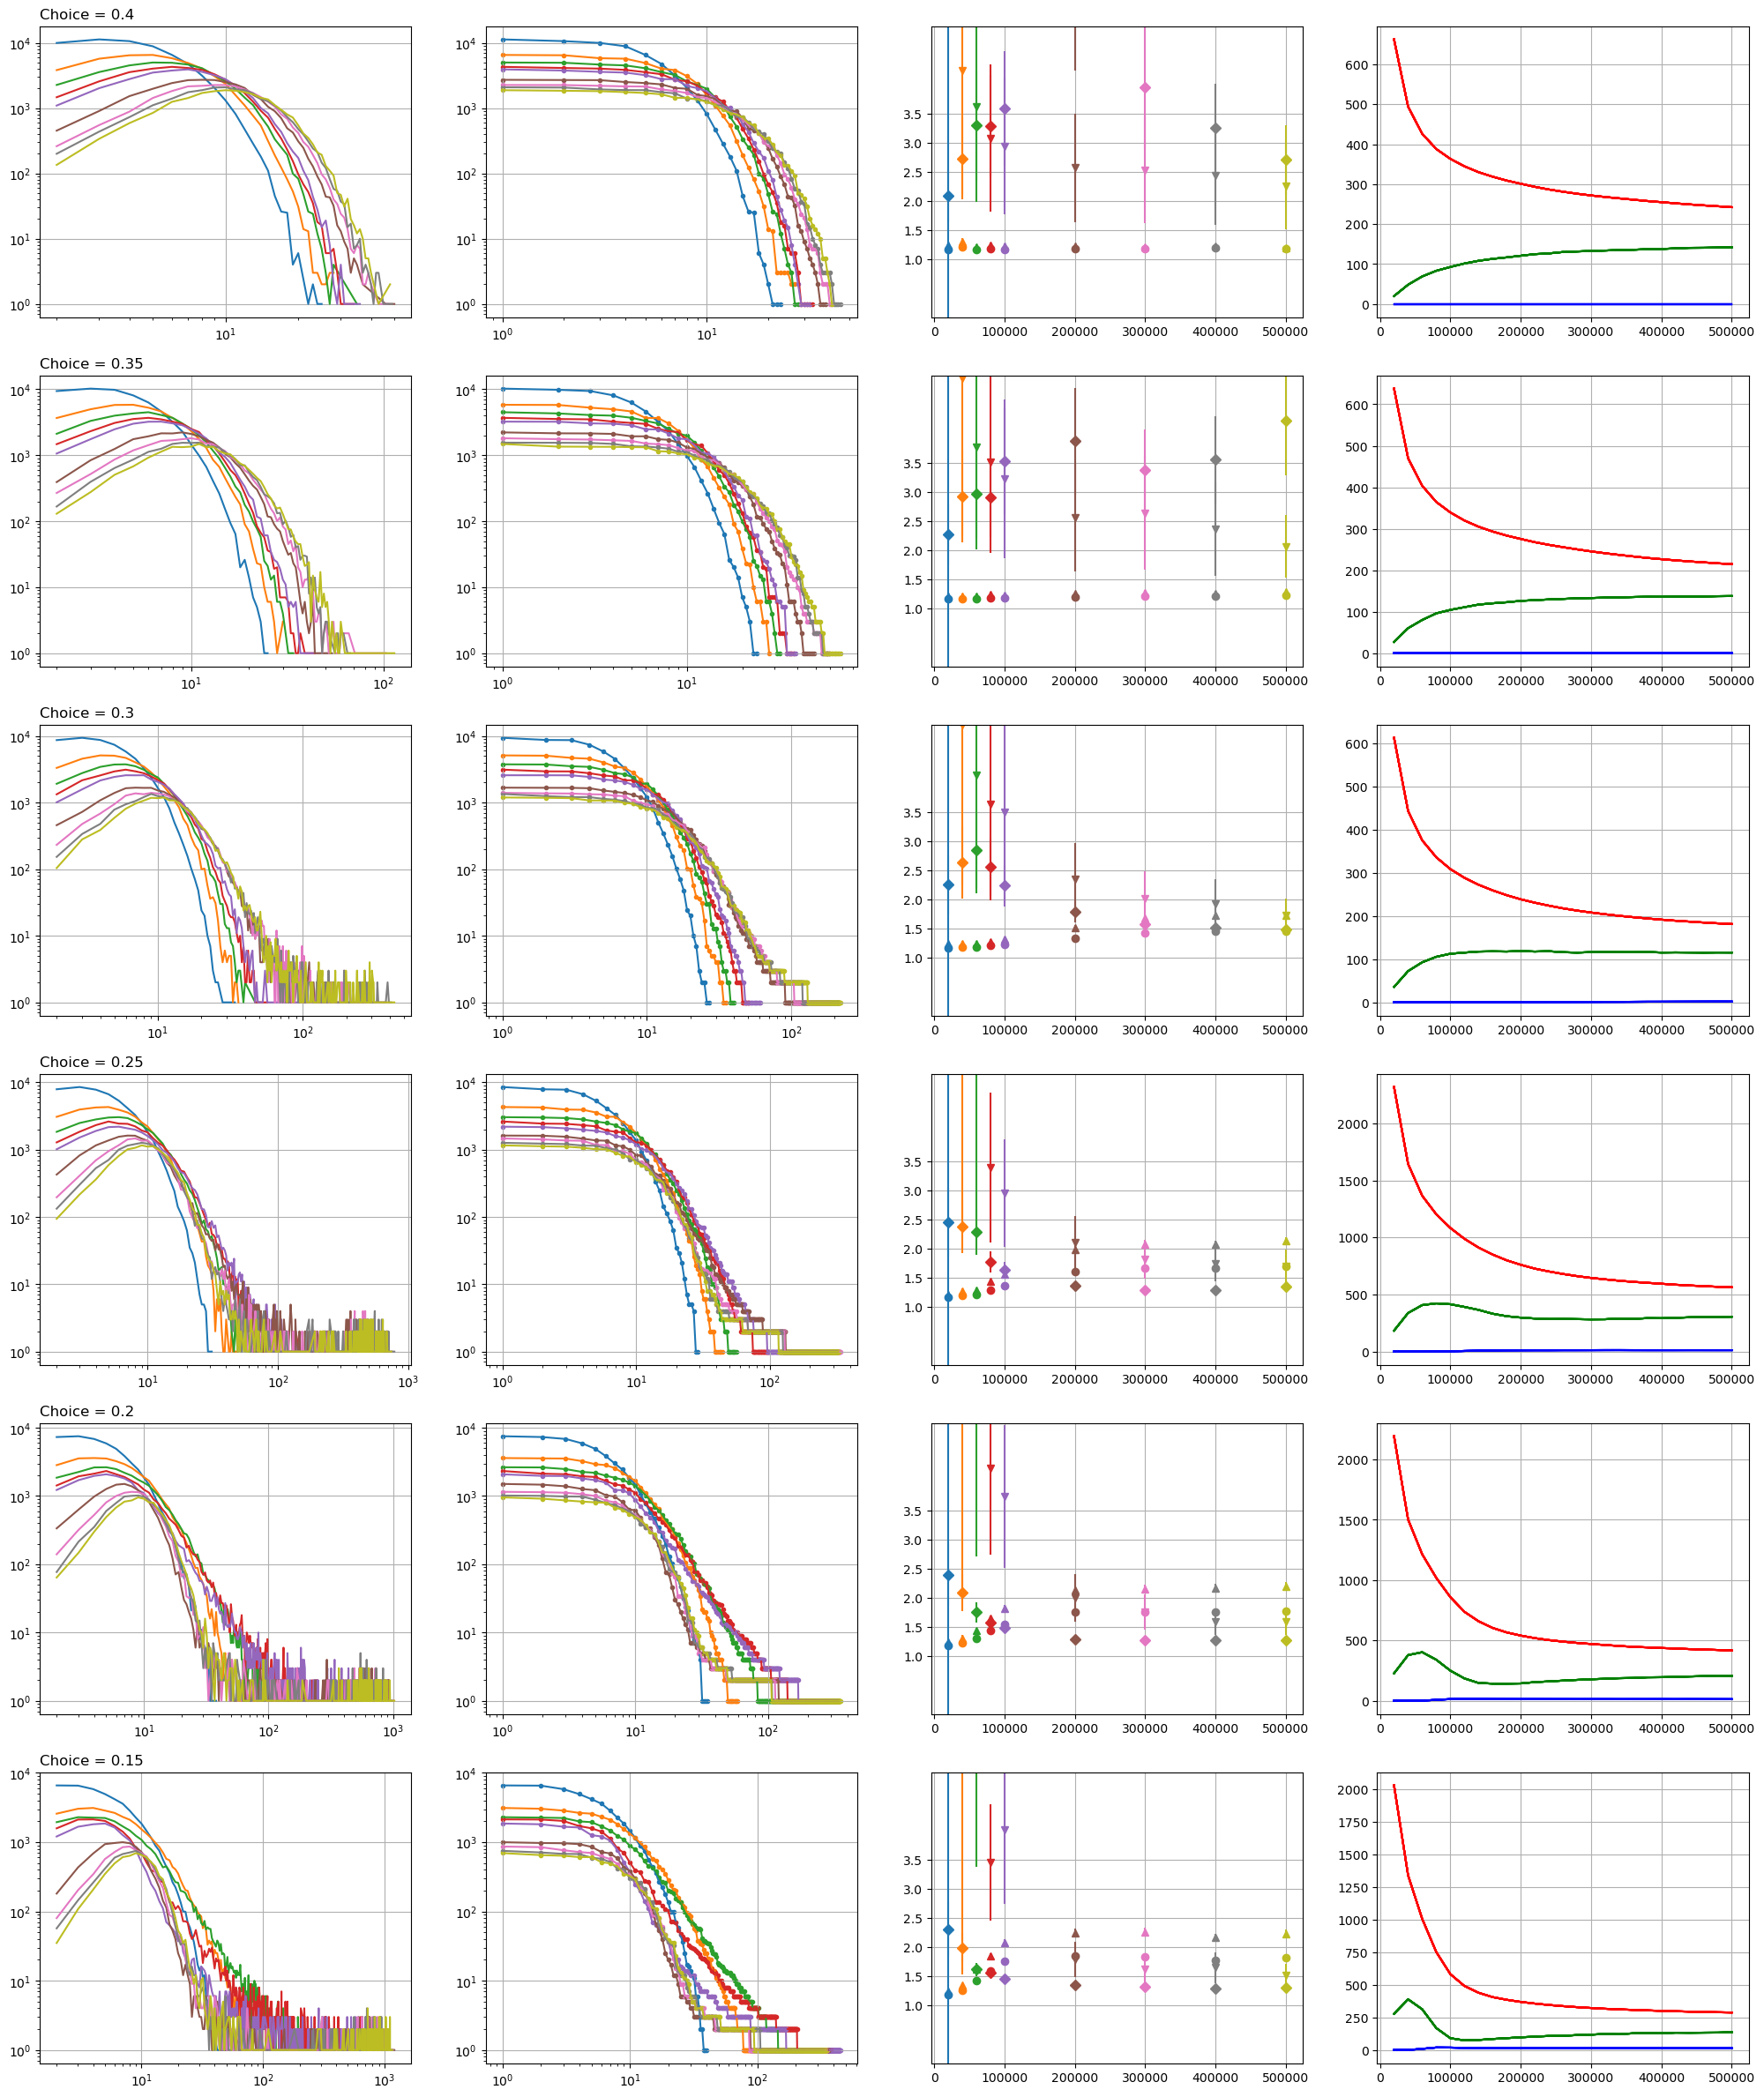

In [48]:
fig, ax = plt.subplots(6,4, figsize=(25, 30))



time = [20000, 40000, 60000, 80000, 100000, 200000, 300000, 400000, 500000 ]
time2 = [20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000, 220000, 240000, 260000, 280000, 300000, 320000, 340000, 360000, 380000, 400000, 420000, 440000, 460000, 480000, 500000]

name = ["0.4000", "0.3500", "0.3000", "0.2500", "0.2000", "0.1500"]
name2= ["0.40000", "0.35000", "0.30000", "0.25000", "0.20000", "0.15000"]
cmap = plt.get_cmap('tab10')

for i in range(len(name)):
    for k, j in enumerate(time):
        
        
        size, amount = np.loadtxt("Pref_attach/Choice_true/{}/r50_2D_c{}_100_{}_0.300000_1.txt".format(name[i], name2[i], j), skiprows=2, unpack=True)
        size = size[1:]
        amount = amount[1:]
        ax[i, 0].loglog(size, amount, label="Time {}".format(name[i]), c=cmap(k))


        lower_lim2 =  [-int(0.6 * len(amount))] * len(name)
        ccdf = np.sort(amount)[::-1]
        ranks = np.arange(1, len(ccdf)+1)
        ax[i, 1].scatter(ranks, ccdf, label="Time {}".format(j), marker='.')
        ax[i, 1].plot(ranks, ccdf)
        lower_lim = 0
        upper_lim = int(10**( (np.log10(len(amount))/3)))
        lower_lim2 = int(10**( 2*(np.log10(len(amount))/3)))
        upper_lim2 = -1
        

        out = calc_alpha(amount, size, lower_lim, upper_lim)
        out2 = calc_alpha(amount, size, upper_lim, lower_lim2)
        out3 = calc_alpha(amount, size, lower_lim2, upper_lim2)
        out4 = calc_alpha(amount, size, 0, -1)
        ax[i,2].errorbar(j, out[0], yerr=out[1], fmt='v', c=cmap(k))
        ax[i,2].errorbar(j, out2[0], yerr=out2[1], fmt='D', c=cmap(k))
        ax[i,2].errorbar(j, out3[0], yerr=out3[1], fmt='^', c=cmap(k))
        ax[i,2].errorbar(j, out4[0], yerr=out4[1], fmt='o', c=cmap(k))
        

        df = pd.read_csv("Pref_attach/Choice_true/{}/r50_2D_c{}_100_CLUSTERS_0.300000_1.txt".format(name[i], name2[i]), sep=" ", header=None)
        #ax[i, 3].plot(time2, df[0], label="> 0", c='r')
        ax[i, 3].plot(time2, df[1], label="> 10", c='#1f77b4')
        #ax[i, 3].plot(time2, df[2], label="> 100", c='b')

        ax[i,0].set_xscale('log')
        ax[i,0].set_yscale('log')
        ax[i,1].set_xscale('log')
        ax[i,1].set_yscale('log')   
        ax[i, 2].set_yticks(np.arange(1, 4, 0.5))
        ax[i, 2].set_ylim(0, 5) 

        ax[i, 0].grid()
        ax[i, 1].grid()
        ax[i, 2].grid()
        ax[i, 3].grid()

ax[0,0].set_title("Choice = 0.4", loc='left')
ax[1,0].set_title("Choice = 0.35", loc='left')
ax[2,0].set_title("Choice = 0.3", loc='left')
ax[3,0].set_title("Choice = 0.25", loc='left')
ax[4,0].set_title("Choice = 0.2", loc='left')
ax[5,0].set_title("Choice = 0.15", loc='left')

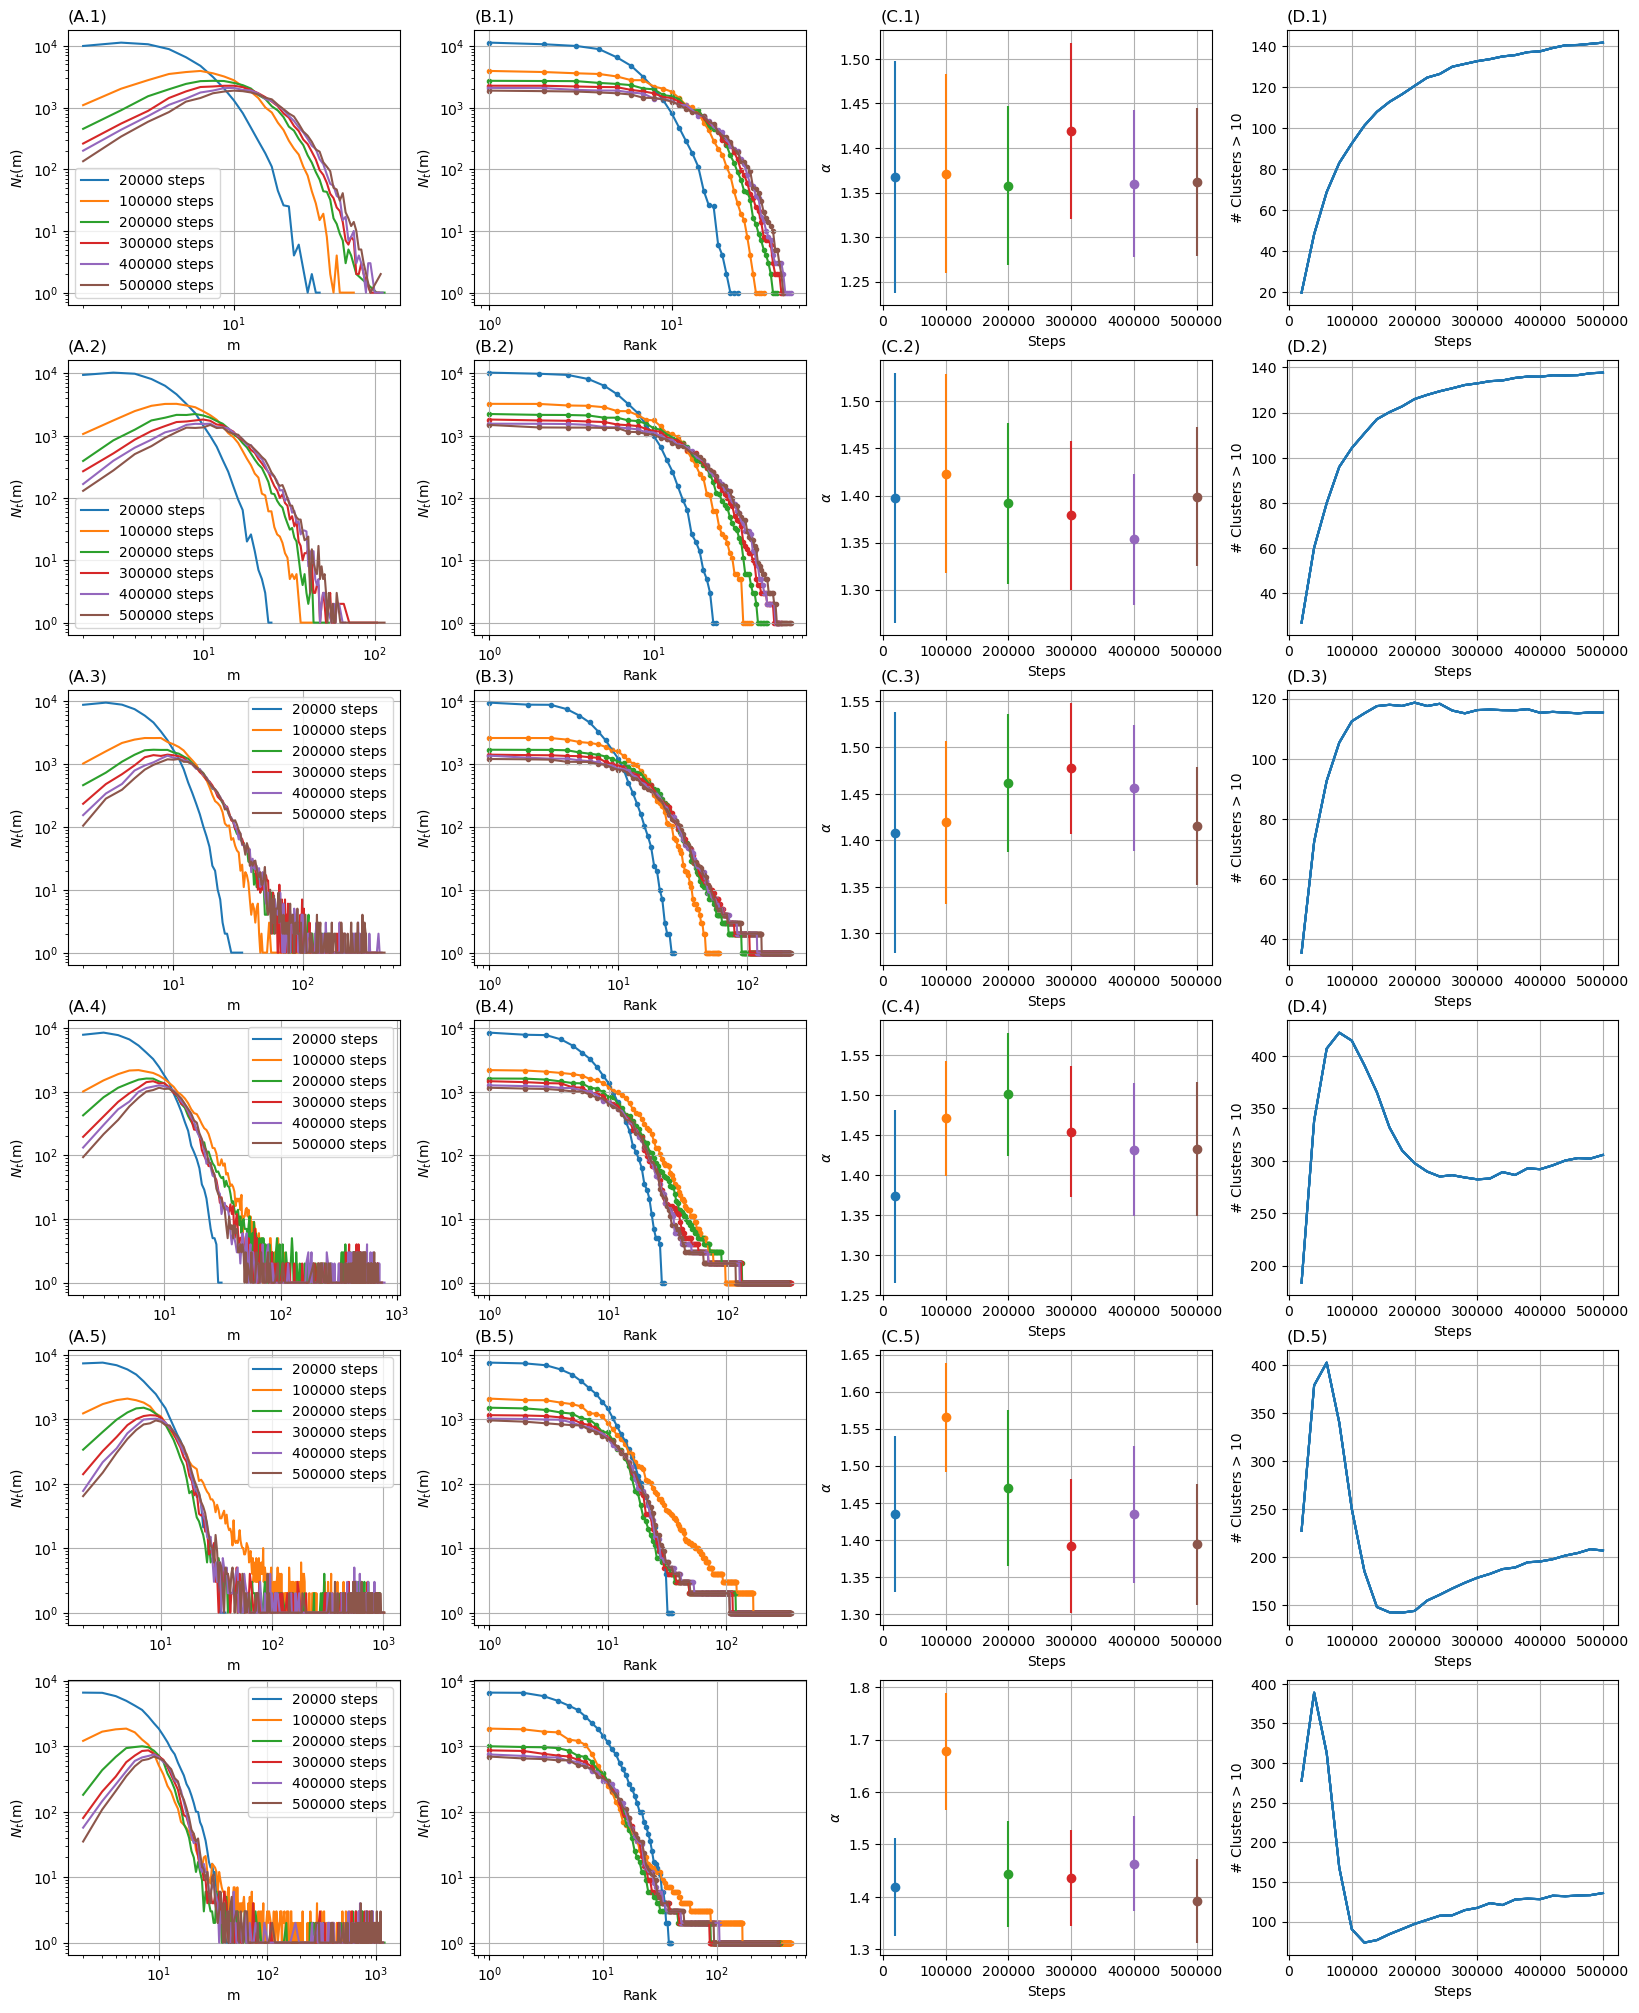

In [2]:
fig, ax = plt.subplots(6,4, figsize=(20, 25))
plt.subplots_adjust(wspace=0.225)

time = [20000, 100000, 200000, 300000, 400000, 500000 ]
time2 = [20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000, 220000, 240000, 260000, 280000, 300000, 320000, 340000, 360000, 380000, 400000, 420000, 440000, 460000, 480000, 500000]

name = ["0.4000", "0.3500", "0.3000", "0.2500", "0.2000", "0.1500"]
name2= ["0.40000", "0.35000","0.30000", "0.25000", "0.20000", "0.15000"]
cmap = plt.get_cmap('tab10')

for i in range(len(name)):
    for k, j in enumerate(time):        
        size, amount = np.loadtxt("Pref_attach/Choice_true/{}/r50_2D_c{}_100_{}_0.300000_1.txt".format(name[i], name2[i], j), skiprows=2, unpack=True)
        size = size[1:]
        amount = amount[1:]
        ax[i, 0].loglog(size, amount, label="{} steps".format(j), c=cmap(k))


        lower_lim2 =  [-int(0.6 * len(amount))] * len(name)
        ccdf = np.sort(amount)[::-1]
        ranks = np.arange(1, len(ccdf)+1)
        ax[i, 1].scatter(ranks, ccdf, label="{} steps".format(j), marker='.')
        ax[i, 1].plot(ranks, ccdf)
        lower_lim = 0
        upper_lim = int(10**( (np.log10(len(amount))/3)))
        lower_lim2 = int(10**( 2*(np.log10(len(amount))/3)))
        upper_lim2 = -1
        
        out = calc_alpha(amount, size, 5, 500)
        ax[i,2].errorbar(j, out[0], yerr=out[1], fmt='o', c=cmap(k))    

        df = pd.read_csv("Pref_attach/Choice_true/{}/r50_2D_c{}_100_CLUSTERS_0.300000_1.txt".format(name[i], name2[i]), sep=" ", header=None)
        #ax[i, 3].plot(time2, df[0], label="> 0", c='r')
        ax[i, 3].plot(time2, df[1], label="> 10", c='#1f77b4')
        #ax[i, 3].plot(time2, df[2], label="> 100", c='b')

        ax[i,0].set_xscale('log')
        ax[i,0].set_yscale('log')
        ax[i,1].set_xscale('log')
        ax[i,1].set_yscale('log')   

    ax[i, 0].set_ylabel(r"$N_t$(m)")
    ax[i, 0].set_xlabel("m")
    ax[i, 0].legend()

    ax[i, 1].set_xlabel("Rank")
    ax[i, 1].set_ylabel(r"$N_t$(m)")

    ax[i, 2].set_xlabel("Steps")
    ax[i, 2].set_ylabel(r"$\alpha$")

    ax[i, 3].set_xlabel("Steps")
    ax[i, 3].set_ylabel("# Clusters > 10")    

    ax[i, 0].grid()
    ax[i, 1].grid()
    ax[i, 2].grid()
    ax[i, 3].grid()

ax[0,0].set_title("(A.1)", loc='left')
ax[0,1].set_title("(B.1)", loc='left')
ax[0,2].set_title("(C.1)", loc='left')
ax[0,3].set_title("(D.1)", loc='left')

ax[1,0].set_title("(A.2)", loc='left')
ax[1,1].set_title("(B.2)", loc='left')
ax[1,2].set_title("(C.2)", loc='left')
ax[1,3].set_title("(D.2)", loc='left')

ax[2,0].set_title("(A.3)", loc='left')
ax[2,1].set_title("(B.3)", loc='left')
ax[2,2].set_title("(C.3)", loc='left')
ax[2,3].set_title("(D.3)", loc='left')

ax[3,0].set_title("(A.4)", loc='left')
ax[3,1].set_title("(B.4)", loc='left')
ax[3,2].set_title("(C.4)", loc='left')
ax[3,3].set_title("(D.4)", loc='left')

ax[4,0].set_title("(A.5)", loc='left')
ax[4,1].set_title("(B.5)", loc='left')
ax[4,2].set_title("(C.5)", loc='left')
ax[4,3].set_title("(D.5)", loc='left')


fig.savefig('finalplot/city_choice.pdf', bbox_inches='tight', pad_inches=0.2)


Text(0.0, 1.0, '(D.5)')

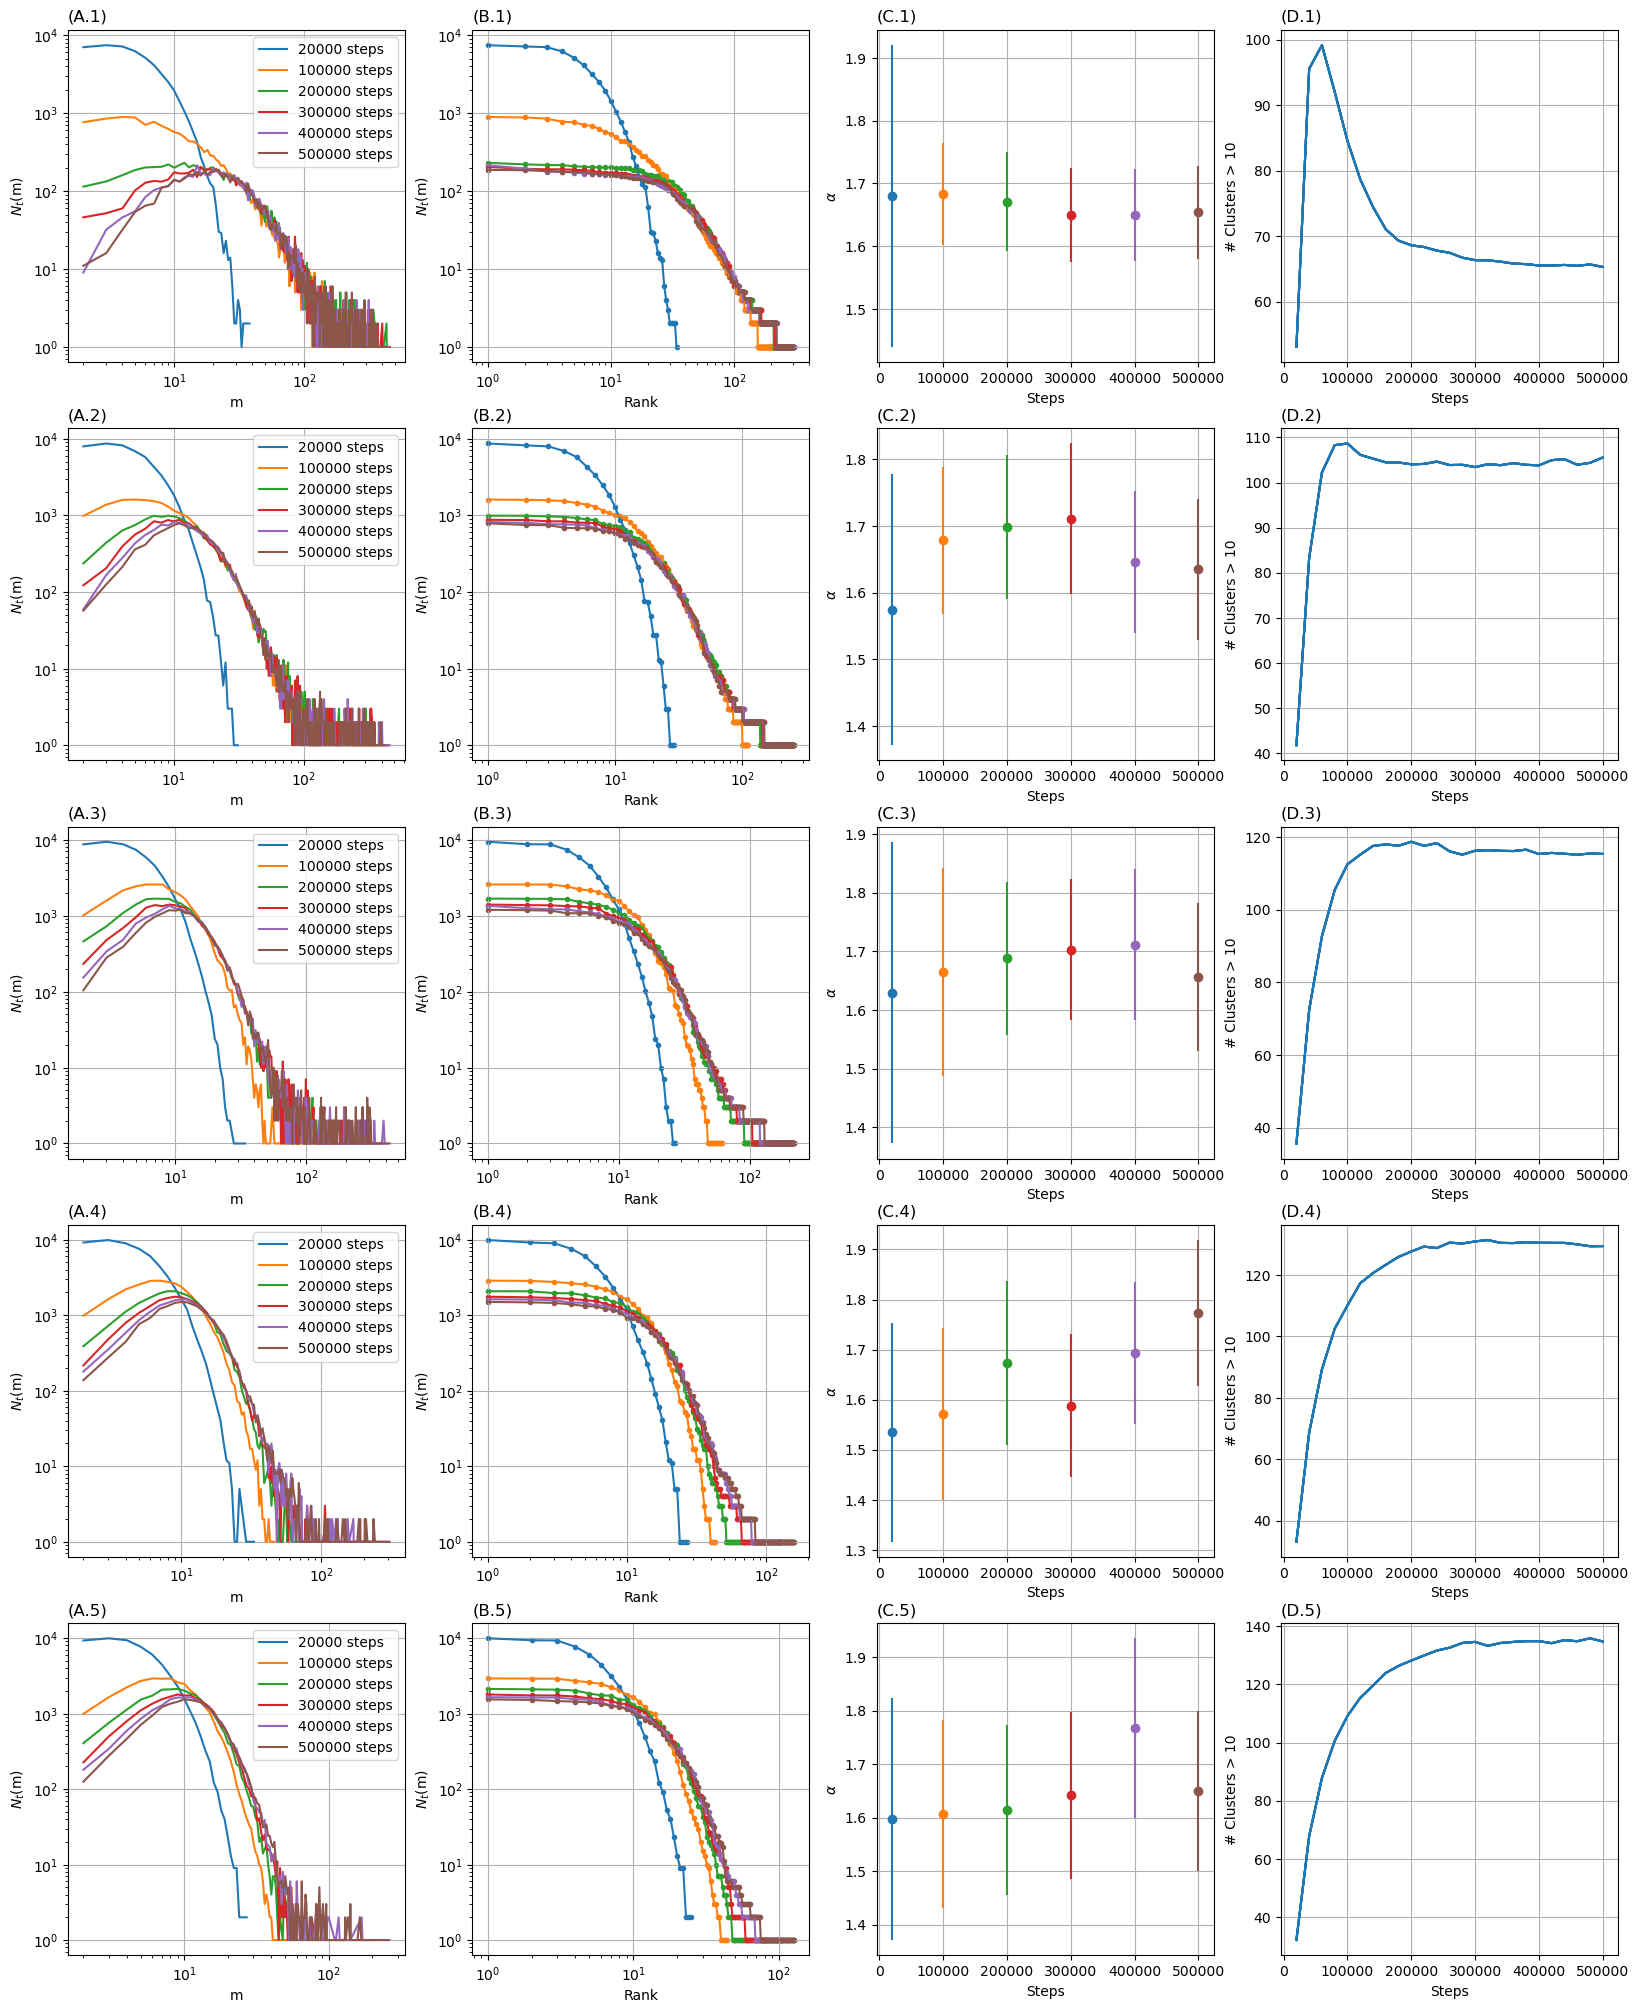

In [5]:
fig, ax = plt.subplots(5,4, figsize=(20, 25))



time = [20000, 100000, 200000, 300000, 400000, 500000 ]
time2 = [20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000, 220000, 240000, 260000, 280000, 300000, 320000, 340000, 360000, 380000, 400000, 420000, 440000, 460000, 480000, 500000]


name= [20,40,50,60, 80]
cmap = plt.get_cmap('tab10')
cutoff = 100

for i in range(len(name)):
    for k, j in enumerate(time):
        
        if (name[i] != 50):
            size, amount = np.loadtxt("Pref_attach/Choice_true/0.3000/r{}/r{}_2D_c0.30000_100_{}_0.300000_1.txt".format(name[i], name[i], j), skiprows=2, unpack=True)
        else:
            size, amount = np.loadtxt("Pref_attach/Choice_true/0.3000/r50_2D_c0.30000_100_{}_0.300000_1.txt".format(j), skiprows=2, unpack=True)
        size = size[1:]
        amount = amount[1:] 
        ax[i, 0].loglog(size, amount, label="{} steps".format(j), c=cmap(k))


        lower_lim2 =  [-int(0.6 * len(amount))] * len(name)
        ccdf = np.sort(amount)[::-1]
        ranks = np.arange(1, len(ccdf)+1)
        ax[i, 1].scatter(ranks, ccdf, label="{} steps".format(j), marker='.')
        ax[i, 1].loglog(ranks, ccdf)
        lower_lim = 0
        upper_lim = int(10**( (np.log10(len(amount))/3)))
        lower_lim2 = int(10**( 2*(np.log10(len(amount))/3)))
        upper_lim2 = -1


        
        out = calc_alpha(amount, size, 5, cutoff)
        
        ax[i,2].errorbar(j, out[0], yerr=out[1], fmt='o', c=cmap(k))
        
        if (name[i] != 50):
            df = pd.read_csv("Pref_attach/Choice_true/0.3000/r{}/r{}_2D_c0.30000_100_CLUSTERS_0.300000_1.txt".format(name[i], name[i]), sep=" ", header=None)
        else:
            df = pd.read_csv("Pref_attach/Choice_true/0.3000/r{}_2D_c0.30000_100_CLUSTERS_0.300000_1.txt".format(name[i], name[i]), sep=" ", header=None)
        #ax[i, 3].plot(time2, df[0], label="> 0", c='r')
        ax[i, 3].plot(time2, df[1], label="> 10", c='#1f77b4')
        #ax[i, 3].plot(time2, df[2], label="> 100", c='b')
    #cutoff = cutoff + 100
    ax[i, 0].set_ylabel(r"$N_t$(m)")
    ax[i, 0].set_xlabel("m")
    ax[i, 0].legend()

    ax[i, 1].set_xlabel("Rank")
    ax[i, 1].set_ylabel(r"$N_t$(m)")

    ax[i, 2].set_xlabel("Steps")
    ax[i, 2].set_ylabel(r"$\alpha$")

    ax[i, 3].set_xlabel("Steps")
    ax[i, 3].set_ylabel("# Clusters > 10")    

    ax[i, 0].grid()
    ax[i, 1].grid()
    ax[i, 2].grid()
    ax[i, 3].grid()

     
ax[0,0].set_title("(A.1)", loc='left')
ax[0,1].set_title("(B.1)", loc='left')
ax[0,2].set_title("(C.1)", loc='left')
ax[0,3].set_title("(D.1)", loc='left')

ax[1,0].set_title("(A.2)", loc='left')
ax[1,1].set_title("(B.2)", loc='left')
ax[1,2].set_title("(C.2)", loc='left')
ax[1,3].set_title("(D.2)", loc='left')

ax[2,0].set_title("(A.3)", loc='left')
ax[2,1].set_title("(B.3)", loc='left')
ax[2,2].set_title("(C.3)", loc='left')
ax[2,3].set_title("(D.3)", loc='left')

ax[3,0].set_title("(A.4)", loc='left')
ax[3,1].set_title("(B.4)", loc='left')
ax[3,2].set_title("(C.4)", loc='left')
ax[3,3].set_title("(D.4)", loc='left')

ax[4,0].set_title("(A.5)", loc='left')
ax[4,1].set_title("(B.5)", loc='left')
ax[4,2].set_title("(C.5)", loc='left')
ax[4,3].set_title("(D.5)", loc='left')

#fig.savefig('finalplot/city_radius.pdf', bbox_inches='tight', pad_inches=0.2)

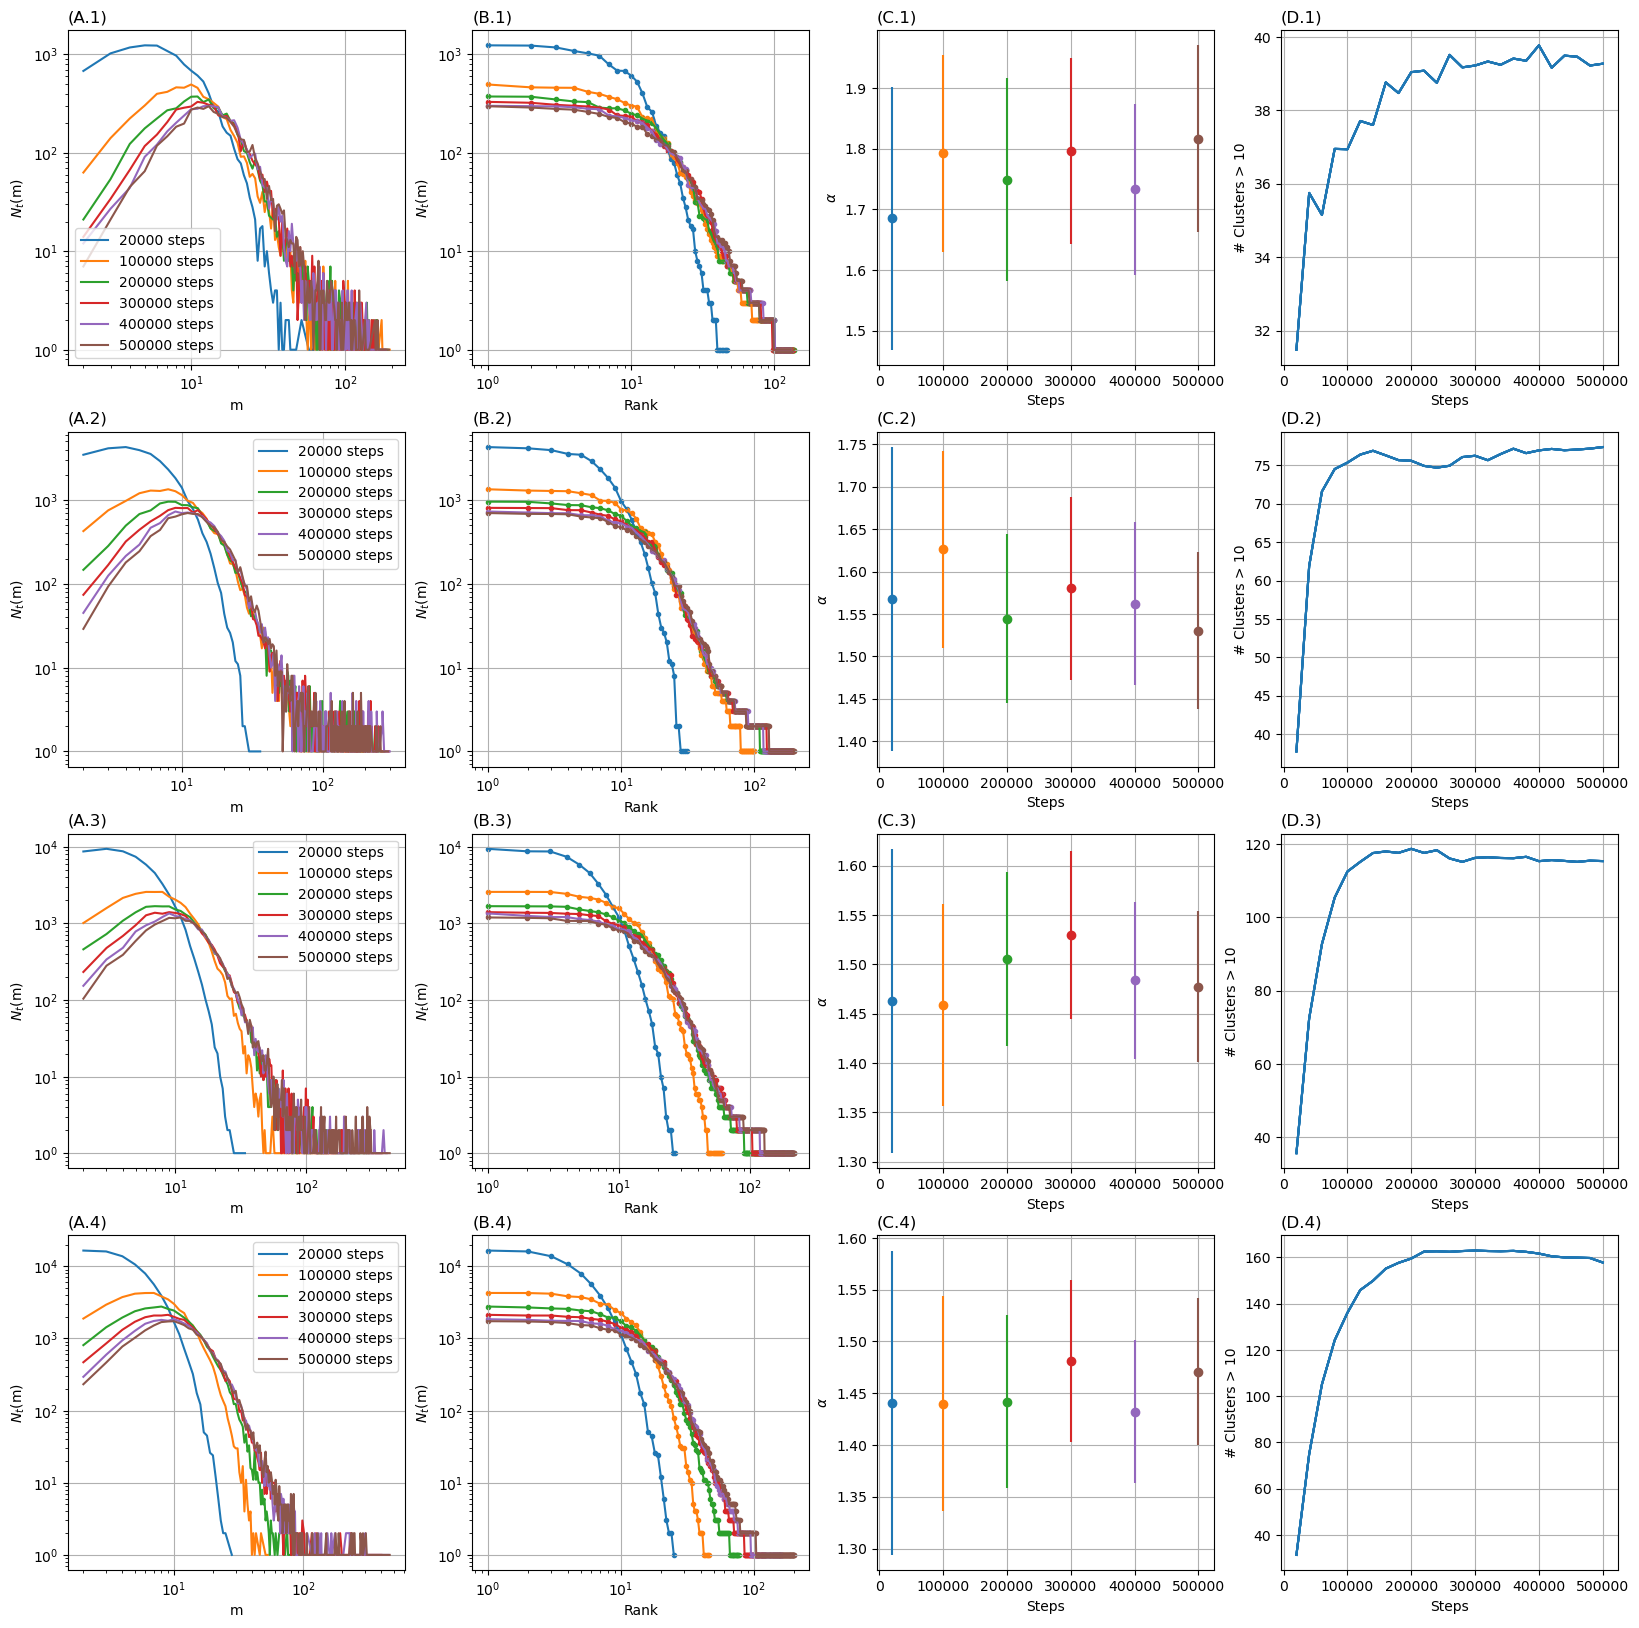

In [35]:
fig, ax = plt.subplots(4,4, figsize=(20, 20))



time = [20000, 100000, 200000, 300000, 400000, 500000 ]
time2 = [20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000, 220000, 240000, 260000, 280000, 300000, 320000, 340000, 360000, 380000, 400000, 420000, 440000, 460000, 480000, 500000]


name= ["dens=0.1", "dens=0.2", 1, "dens=0.4"]
name2 = ["0.100000" , "0.200000", "1.00000", "0.400000"]
cmap = plt.get_cmap('tab10')
cutoff = 100
for i in range(len(name)):
    for k, j in enumerate(time):
        
        if (i==2):
            size, amount = np.loadtxt("Pref_attach/Choice_true/0.3000/r50_2D_c0.30000_100_{}_0.300000_1.txt".format(j), skiprows=2, unpack=True)
        else:
            size, amount = np.loadtxt("Pref_attach/Choice_true/0.3000/{}/r50_2D_c0.30000_100_{}_{}_1.txt".format(name[i], j, name2[i]), skiprows=2, unpack=True)
        size = size[1:]
        amount = amount[1:]
        ax[i, 0].loglog(size, amount, label="{} steps".format(j), c=cmap(k))

        lower_lim2 =  [-int(0.6 * len(amount))] * len(name)
        ccdf = np.sort(amount)[::-1]
        ranks = np.arange(1, len(ccdf)+1)
        ax[i, 1].scatter(ranks, ccdf, label="Time {}".format(j), marker='.')
        ax[i, 1].loglog(ranks, ccdf)
        lower_lim = 0
        upper_lim = int(10**( (np.log10(len(amount))/3)))
        lower_lim2 = int(10**( 2*(np.log10(len(amount))/3)))
        upper_lim2 = -1
 
        out = calc_alpha(amount, size, 8, cutoff)

        ax[i,2].errorbar(j, out[0], yerr=out[1], fmt='o', color=cmap(k))
        
        if (i==2):
            df = pd.read_csv("Pref_attach/Choice_true/0.3000/r50_2D_c0.30000_100_CLUSTERS_0.300000_1.txt".format(j), sep=" ", header=None)
        else:
            df = pd.read_csv("Pref_attach/Choice_true/0.3000/{}/r50_2D_c0.30000_100_CLUSTERS_{}_1.txt".format(name[i], name2[i]), sep=" ", header=None)
        #ax[i, 3].plot(time2, df[0], label="> 0", c='r')
        ax[i, 3].plot(time2, df[1], label="> 10", c='#1f77b4')
        #ax[i, 3].plot(time2, df[2], label="> 100", c='b')
    cutoff = cutoff + 200
    ax[i, 0].set_ylabel(r"$N_t$(m)")
    ax[i, 0].set_xlabel("m")
    ax[i, 0].legend()

    ax[i, 1].set_xlabel("Rank")
    ax[i, 1].set_ylabel(r"$N_t$(m)")

    ax[i, 2].set_xlabel("Steps")
    ax[i, 2].set_ylabel(r"$\alpha$")

    ax[i, 3].set_xlabel("Steps")
    ax[i, 3].set_ylabel("# Clusters > 10")    

    ax[i, 0].grid()
    ax[i, 1].grid()
    ax[i, 2].grid()
    ax[i, 3].grid()

  
ax[0,0].set_title("(A.1)", loc='left')
ax[0,1].set_title("(B.1)", loc='left')
ax[0,2].set_title("(C.1)", loc='left')
ax[0,3].set_title("(D.1)", loc='left')

ax[1,0].set_title("(A.2)", loc='left')
ax[1,1].set_title("(B.2)", loc='left')
ax[1,2].set_title("(C.2)", loc='left')
ax[1,3].set_title("(D.2)", loc='left')

ax[2,0].set_title("(A.3)", loc='left')
ax[2,1].set_title("(B.3)", loc='left')
ax[2,2].set_title("(C.3)", loc='left')
ax[2,3].set_title("(D.3)", loc='left')

ax[3,0].set_title("(A.4)", loc='left')
ax[3,1].set_title("(B.4)", loc='left')
ax[3,2].set_title("(C.4)", loc='left')
ax[3,3].set_title("(D.4)", loc='left')



fig.savefig('finalplot/city_dens.pdf', bbox_inches='tight', pad_inches=0.2)









1.229465030778691 0.04416056576322766
------------------------------------
1.4534123659746172 0.042843441490365765
------------------------------------
1.4956211425940216 0.04562562439658219
------------------------------------
1.512916094449835 0.04701894128837438
61 28.0 101 6.0
------------------------------------
1.5078356027743967 0.047151351997769285
-16.50130188136153 0.09309772498227491


/tmp/ipykernel_9201/3605421015.py:37: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[0, 1].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')
/home/sennevw/anaconda3/envs/thesisvenv/lib/python3.11/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /
Assuming nested distributions


-23.654413331350685 6.06381611589768e-12
-18.742388288115986 0.00025831763647247324
-23.515094741906175 0.00012125977805477928
4.912025043234705 0.005840068750943653
0.1393185894445077 0.9541359015203728
------------------------------------
1.5374373278512117 0.048857938895564695
-4.478767433263173 0.6765827847256906


Assuming nested distributions


-19.857980503109182 2.937152743243132e-10
-12.708432888336487 0.003902279078801309
-17.002000927302717 0.002190695253532423
7.149547614772697 3.81087196885198e-13
2.8559795758064626 0.0388449532039658
------------------------------------


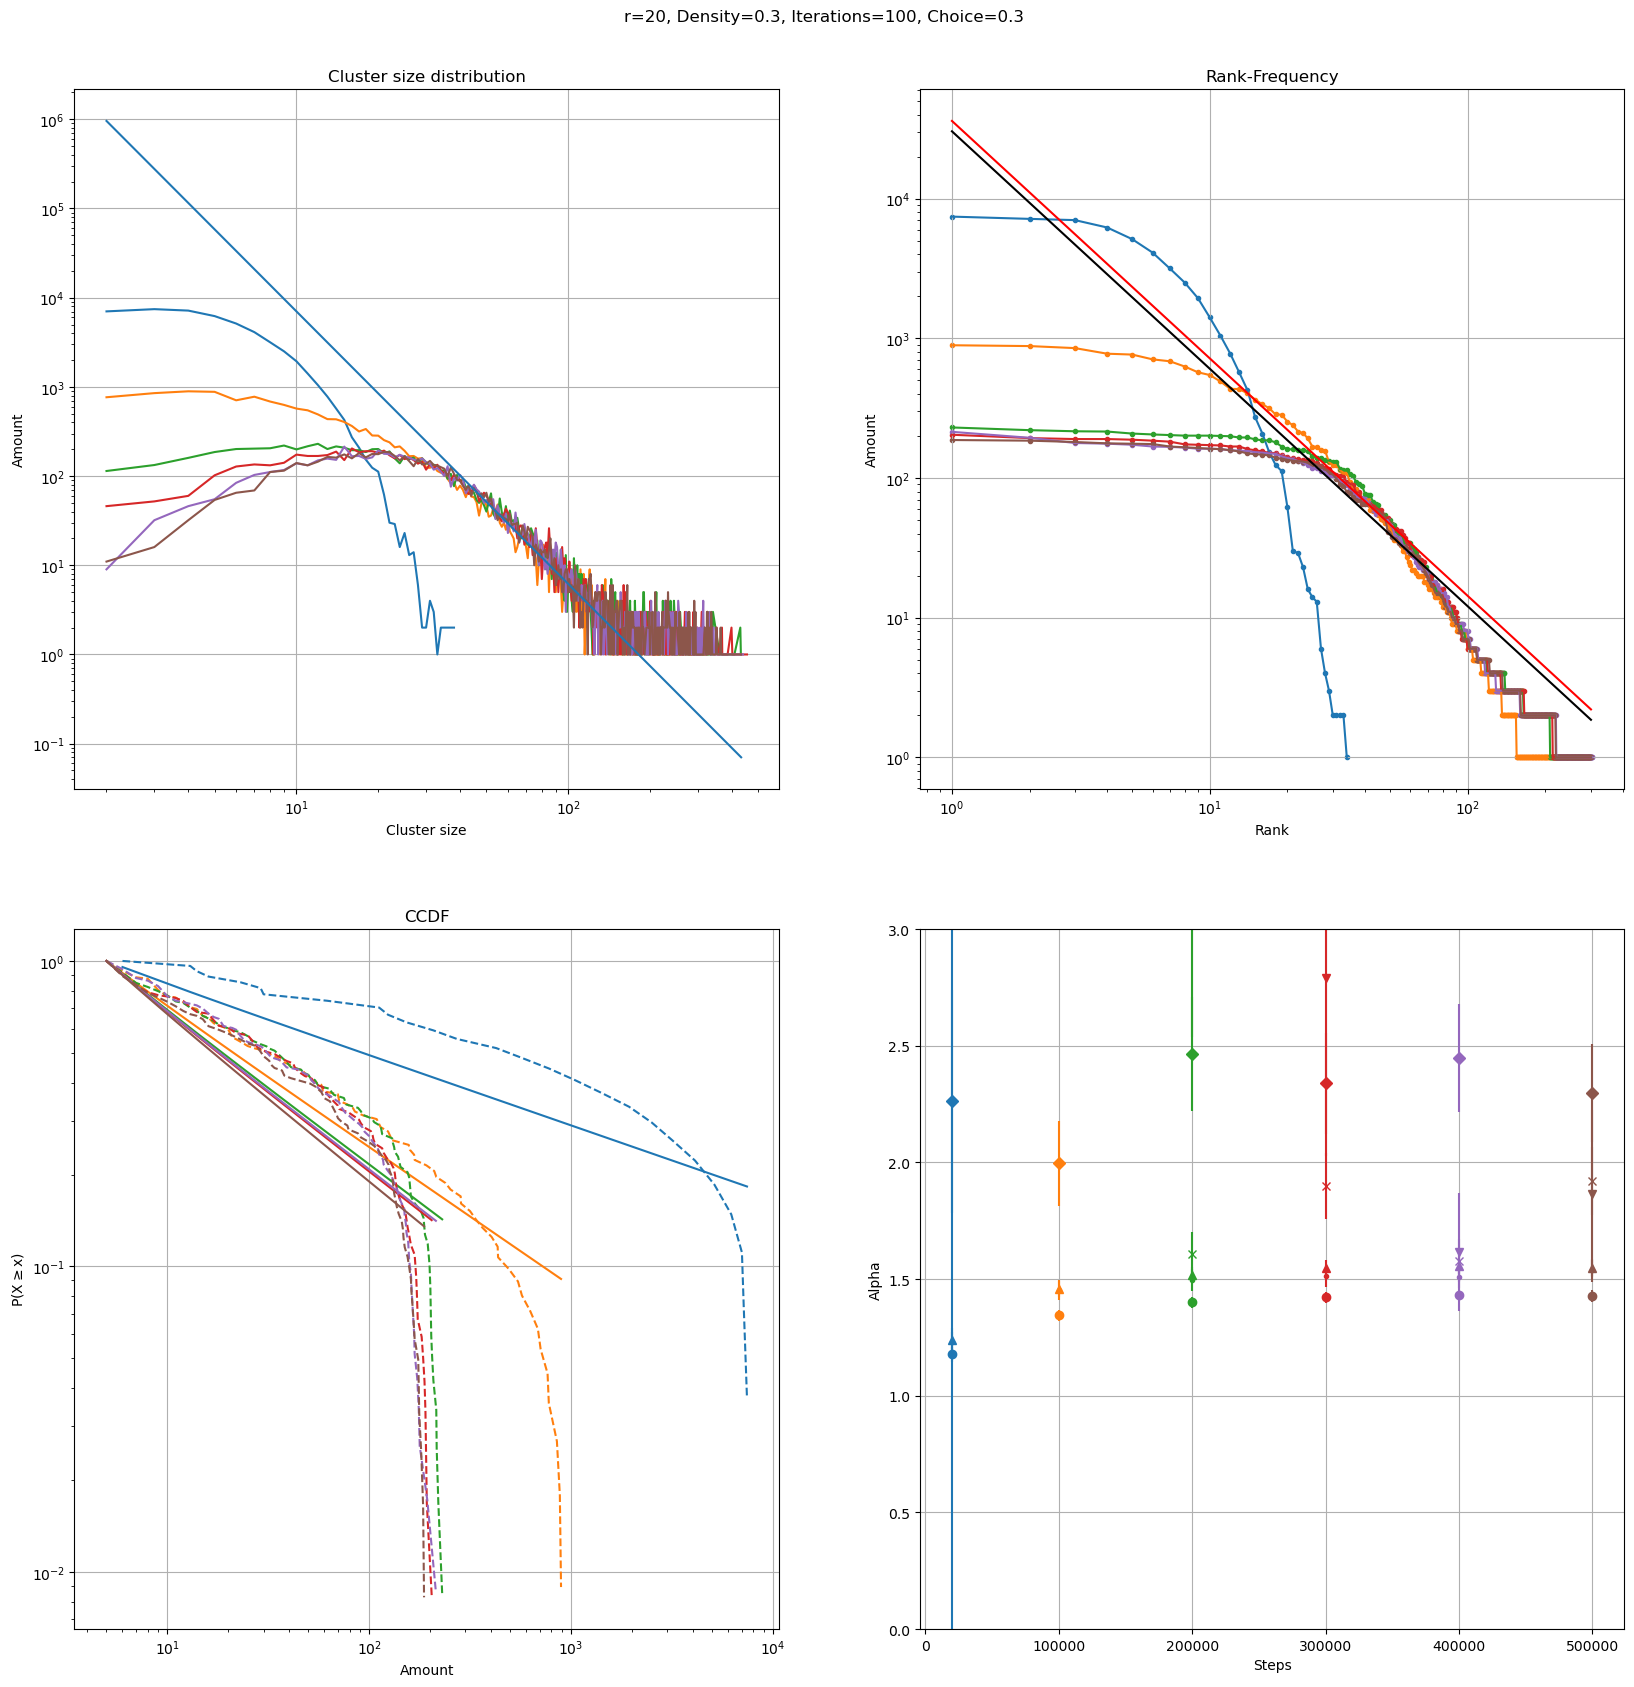

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(20, 20))
name = [20000,100000, 200000, 300000, 400000, 500000]
  
ax[0, 0].grid()
ax[0, 1].grid()
ax[1,0].grid()
ax[1,1].grid()

ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')

ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')

cmap = plt.get_cmap('tab10')
for i in range((len(name))):

    size, amount = np.loadtxt("Pref_attach/Choice_true/0.3000/r20/r20_2D_c0.30000_100_{}_0.300000_1.txt".format(name[i]), skiprows=2, unpack=True)
    size = size[1:]
    amount = amount[1:]
    ax[0, 0].loglog(size, amount, label="Time {}".format(name[i]), c=cmap(i))
    
    lower_lim2 =  [-int(0.6 * len(amount))] * len(name)

    result = powerlaw.Fit(amount, discrete=True, xmin=5)
    result.plot_ccdf(ax=ax[1, 0], linestyle='--', label="upper_lim = [int(0.1 * len(amount))] * len(name)Time {}".format(name[i]), c=cmap(i))
    result.power_law.plot_ccdf(ax=ax[1, 0],  label="Time {}".format(name[i]), c=cmap(i))
    ax[1,1].errorbar(name[i], result.power_law.alpha, yerr=result.power_law.sigma, fmt='.', color=cmap(i))
    print(result.power_law.alpha, result.power_law.sigma)


    ccdf = np.sort(amount)[::-1]
    ranks = np.arange(1, len(ccdf)+1)

    if(name[i] == 300000):
        print(ranks[60], ccdf[60], ranks[100], ccdf[100])
    ax[0, 1].scatter(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i), marker='.')
    ax[0, 1].loglog(ranks, ccdf, label="Time {}".format(name[i]), c=cmap(i))


    lower_lim = 0
    upper_lim = int(10**( (np.log10(len(amount))/3)))
    lower_lim2 = int(10**( 2*(np.log10(len(amount))/3)))
    upper_lim2 = -1

    out = calc_alpha(amount, size, lower_lim, upper_lim)
    out2 = calc_alpha(amount, size, upper_lim, lower_lim2)
    out3 = calc_alpha(amount, size, lower_lim2, upper_lim2)
    out4 = calc_alpha(amount, size, 0, -1)
    
    #plot vertical lines on lower and upper lim for i=2
    if (i == 2 or i==3 or i==4 or i==5):
        out5 = calc_alpha(amount, size, 60, 100)
        ax[1,1].errorbar(name[i], out5[0], yerr=out5[1], fmt='x', c=cmap(i))

    ax[1,1].errorbar(name[i], out[0], yerr=out[1], fmt='v', c=cmap(i))
    ax[1,1].errorbar(name[i], out2[0], yerr=out2[1], fmt='D', c=cmap(i))
    ax[1,1].errorbar(name[i], out3[0], yerr=out3[1], fmt='^', c=cmap(i))
    ax[1,1].errorbar(name[i], out4[0], yerr=out4[1], fmt='o', c=cmap(i))
  

        
    if i == 4  or i == 5:
        r, p = result.distribution_compare('power_law', 'exponential')
        print(r, p)
        r, p = result.distribution_compare('power_law', 'truncated_power_law')
        print(r, p)
        r, p = result.distribution_compare('power_law', 'lognormal')
        print(r, p)
        r, p = result.distribution_compare('power_law', 'stretched_exponential')
        print(r, p)
        r, p = result.distribution_compare('truncated_power_law', 'lognormal')
        print(r, p)
        r, p = result.distribution_compare('truncated_power_law', 'stretched_exponential')
        print(r, p)

    print('------------------------------------')

fig.suptitle("r=20, Density=0.3, Iterations=100, Choice=0.3", y=0.92)

ax[0,0].set_xlabel("Cluster size")
ax[0,0].set_ylabel("Amount")
ax[0,0].set_title("Cluster size distribution")

ax[1,1].set_xlabel("Steps")
ax[1,1].set_ylabel("Alpha")

ax[0,1].set_title("Rank-Frequency")

ax[0,1].set_xlabel("Rank")
ax[0,1].set_ylabel("Amount")
ax[1,0].set_title("Alpha as function of steps")


ax[1,0].set_xlabel("Amount")
ax[1,0].set_ylabel("P(X" + r'$ \geq$' +"x)")
ax[1,0].set_title("CCDF")


ax[0,0].set_xscale('log')
ax[0,0].set_yscale('log')
ax[1,1].set_ylim([0,3])


ax[0,1].plot(ranks, 28 * (ranks/61)**(-1.7), c='black')
ax[0,1].plot(ranks, 105 * (ranks/31)**(-1.7), c='red')
#ax[0,1].plot(ranks, 28 * (ranks/61)**(-1.6), c='black')

ax[0,0].plot(size, 28 * (size/61)**(-3.0549435138472774))

Calculating best minimal value for power law fit


[ 9. 18.  6. 47.  5. 16.  5.  5.  6. 37.  6.  6. 12.  5. 11.  9.  5.  6.
  9. 12. 12. 18.  7.  7.  8.  6. 14.  5.  6.  6.  8.  7.  7.  5. 11.  6.
  5.  6.  5.  9.  5. 14. 83.  5.  5.  8.  8. 10. 20. 13.  7.  5.  7.  6.
  5.  6.  8.  5.  6.  6. 10. 11.  7.  6.  5.  5.  6.  6. 11.  5.  5.  8.
  5.  6. 20.  5.  8.  5.  6.  6.  7. 10.  5.  7.  9.  6.  7.  5.  5.  6.
  7.  6.  5.  6.  6.  5.  5. 12. 12.  6.  9.  6.  5.  5.  5.  7. 12.  5.
  5.  8.  6. 10.  6.  5.  7.  8. 25.  8. 20.  6. 11.  8.  9.  7.  9. 13.
 16. 11.  6. 10.  7.  5.  5.  6.  9.  6. 12.  7.  5.  6. 24.  5.  6.  6.
  7.  7. 11.  7. 12.  6.  5.  6.  5. 26.  7.  7.  8.  5. 12. 10. 17. 15.
 11.  5.  9. 13.  6. 14.  6. 18.  8.  6. 11.  6.  5.  7. 14.  5.  9.  7.
 20.  6.  6.  8.  9. 20.  7.  6.  5.  6.  7. 12.  6.  5.  7.  9.  7. 12.
  8.  5.]
3.2078862557724124 0.15612113435452488
[3.5153140720065967, mpf('0.19123506771302373')]
-0.5845719539552106


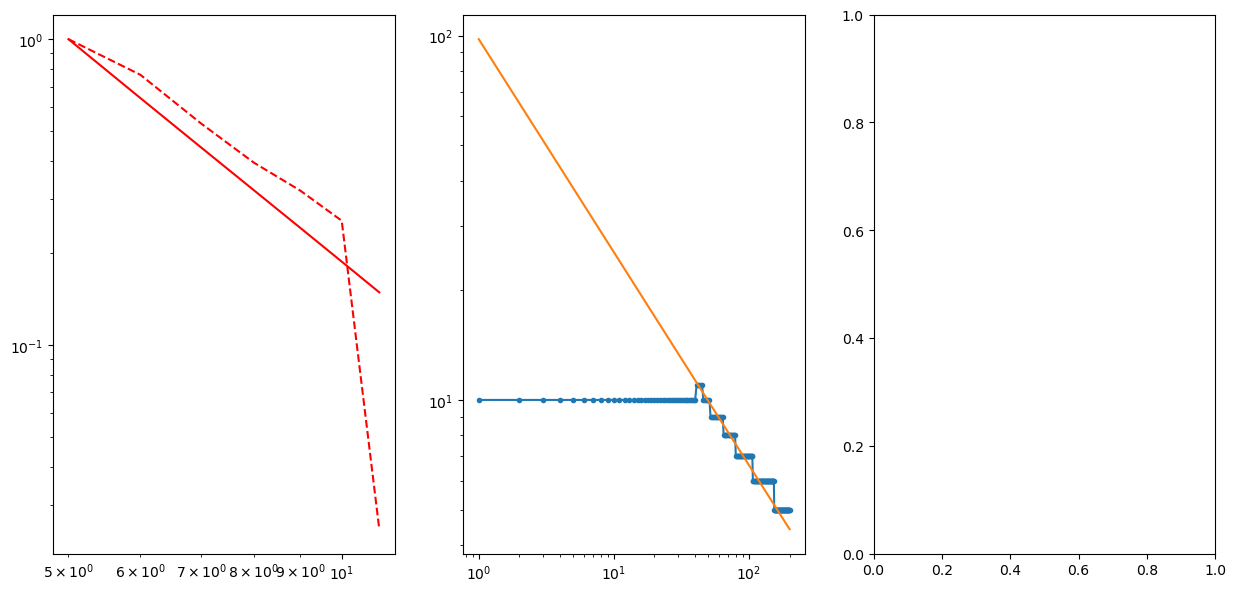

In [14]:
fig, ax = plt.subplots(1,3, figsize=(15, 7))

pl = powerlaw.Power_Law(xmin=5, parameters=[3], discrete=True)
baaaaaaaah = pl.generate_random(200)




ccdf = np.sort(baaaaaaaah)[::-1]
ranks = np.arange(1, len(ccdf)+1)

for i in range(0, len(ccdf)):
    ccdf[0] = 10
    if i>0 and i<40:
        #ccdf[i] = (10**1) * i**(0.5)
        ccdf[i] = 10

#ax[1].loglog(data)
ax[1].loglog(ranks, ccdf)
ax[1].scatter(ranks, ccdf, marker='.')


results = powerlaw.Fit(ccdf, discrete=True, xmax=40)
results.plot_ccdf(ax=ax[0], color='r', linestyle='--', label="powerlaw")
results.power_law.plot_ccdf(ax=ax[0], color='r', label="powerlaw")
print(baaaaaaaah)
print(results.power_law.alpha, results.power_law.sigma)




print(calc_alpha(ccdf, ccdf, 25, -1))

point1 = 41
point2 = 90
#write the lines under this again but with point1 and point2

ax[1].plot(ranks, ccdf[point1]* (ranks/(point1 +1))**((np.log10(ccdf[point2]/ccdf[point1])/np.log10((point2 +1)/(point1 +1)))))
print(np.log10(ccdf[point2]/ccdf[point1])/np.log10((point2 +1)/(point1 +1)))

